In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
housing_vac_23 = pd.read_csv('C:/Users/rhian/Downloads/Alachua_ACS_Housing_Units_Vacancy_Status_Boundaries.csv')
housing_vac_14 = pd.read_csv('C:/Users/rhian/Downloads/Alachua_2014_ACS_Housing_Units_Vacancy_Status_Boundaries.csv')

# Display the first few rows
# print(housing_vac_23.head())

In [ ]:
# print(housing_vac_14.head())

In [3]:
# Merge by name (aka what each census tract is identified by)
total_vac = pd.merge(housing_vac_23, housing_vac_14, on = 'Name', suffixes = ('_2023', '_2014'))

In [ ]:
print(total_vac.head())

In [4]:
# I created these variables to represent the change between 2023 and 2014 for each census tract.
total_vac['Change_Total_Housing'] = total_vac['Total_Housing_Units_2023'] - total_vac['Total_Housing_Units_2014']
total_vac['Change_Vacant_Housing'] = total_vac['Vacant_Housing_Units_2023'] - total_vac['Vacant_Housing_Units_2014']
total_vac['Change_Owner_Occupied_Housing'] = total_vac['Owner_Occupied_Housing_2023'] - total_vac['Owner_Occupied_Housing_2014']
total_vac['Change_Renter_Occupied_Housing'] = total_vac['Renter_Occupied_Units_2023'] - total_vac['Renter_Occupied_Units_2014']
# include for migrant workers

In [ ]:
#print(total_vac['Change_Total_Housing'].head())

In [5]:
# Define the dependent and independent variables for linear regression.
X = total_vac[['Change_Total_Housing', 'Change_Vacant_Housing', 'Change_Owner_Occupied_Housing', 'Change_Renter_Occupied_Housing']]
Y = total_vac['Total_Housing_Units_2023']

In [6]:
# Split data into training and testing sets. More info on the details behind this online
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Create and train the linear regression model!!
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

In [7]:
# note: need to check for multicollinearity
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
MSE = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)
print('Mean squared error:', MSE)
print('R^2 score:', R2)

Coefficients: [ 1.10987462 -1.52791867  1.37464012  1.26315317]
Intercept: 1626.3083301327597
Mean squared error: 991188.6868971839
R^2 score: 0.12554811372605024


In [8]:
# Descriptive Statistics for 2014 and 2023
descriptive_stats_2014 = housing_vac_14.describe()
descriptive_stats_2023 = housing_vac_23.describe()

print("Descriptive Statistics for 2014:")
print(descriptive_stats_2014)
print("\nDescriptive Statistics for 2023:")
print(descriptive_stats_2023)

Descriptive Statistics for 2014:
       Total_Housing_Units  Total_Housing_Units_ME  Vacant_Housing_Units  \
count            56.000000               56.000000             56.000000   
mean           2023.482143               98.982143            306.750000   
std            1070.998480               44.912234            201.510591   
min              52.000000               30.000000             17.000000   
25%            1181.750000               66.250000            145.750000   
50%            1906.500000               91.500000            275.500000   
75%            2998.500000              121.750000            439.750000   
max            4565.000000              244.000000            828.000000   

       Vacant_Housing_Units_ME  Vacant_Housing_For_Rent  \
count                56.000000                56.000000   
mean                127.553571               103.821429   
std                  60.624004               114.555284   
min                  15.000000                

In [12]:
# Paired t-test
t_test_results = {
    'Total_Housing_Units': ttest_rel(total_vac['Total_Housing_Units_2023'], total_vac['Total_Housing_Units_2014']),
    'Vacant_Housing_Units': ttest_rel(total_vac['Vacant_Housing_Units_2023'], total_vac['Vacant_Housing_Units_2014']),
    'Owner_Occupied_Housing': ttest_rel(total_vac['Owner_Occupied_Housing_2023'], total_vac['Owner_Occupied_Housing_2014']),
    'Renter_Occupied_Units': ttest_rel(total_vac['Renter_Occupied_Units_2023'], total_vac['Renter_Occupied_Units_2014'])
}

print("\nPaired t-test Results:")
for key, result in t_test_results.items():
    print(f"{key}: t-statistic ={result.statistic}, p-value = {result.pvalue}")


Paired t-test Results:
Total_Housing_Units: t-statistic =6.828063284085806, p-value = 2.043274072966101e-08
Vacant_Housing_Units: t-statistic =-2.445182099519539, p-value = 0.018550016880781745
Owner_Occupied_Housing: t-statistic =4.418401411432543, p-value = 6.401846902993266e-05
Renter_Occupied_Units: t-statistic =2.418805625028377, p-value = 0.019775498414806348


In [13]:
# Wilcoxon signed-rank test
wilcoxon_results = {
    'Total_Housing_Units': wilcoxon(total_vac['Total_Housing_Units_2023'], total_vac['Total_Housing_Units_2014']),
    'Vacant_Housing_Units': wilcoxon(total_vac['Vacant_Housing_Units_2023'], total_vac['Vacant_Housing_Units_2014']),
    'Owner_Occupied_Housing': wilcoxon(total_vac['Owner_Occupied_Housing_2023'], total_vac['Owner_Occupied_Housing_2014']),
    'Renter_Occupied_Units': wilcoxon(total_vac['Renter_Occupied_Units_2023'], total_vac['Renter_Occupied_Units_2014'])
}

print("\nWilcoxon signed-rank test Results:")
for key, result in wilcoxon_results.items():
    print(f"{key}: statistic = {result.statistic}, p-value = {result.pvalue}")


Wilcoxon signed-rank test Results:
Total_Housing_Units: statistic = 61.0, p-value = 6.448146905313479e-09
Vacant_Housing_Units: statistic = 293.0, p-value = 0.010490604247650026
Owner_Occupied_Housing: statistic = 133.0, p-value = 2.392405957262627e-05
Renter_Occupied_Units: statistic = 322.0, p-value = 0.026736828644118305


C:\Users\rhian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


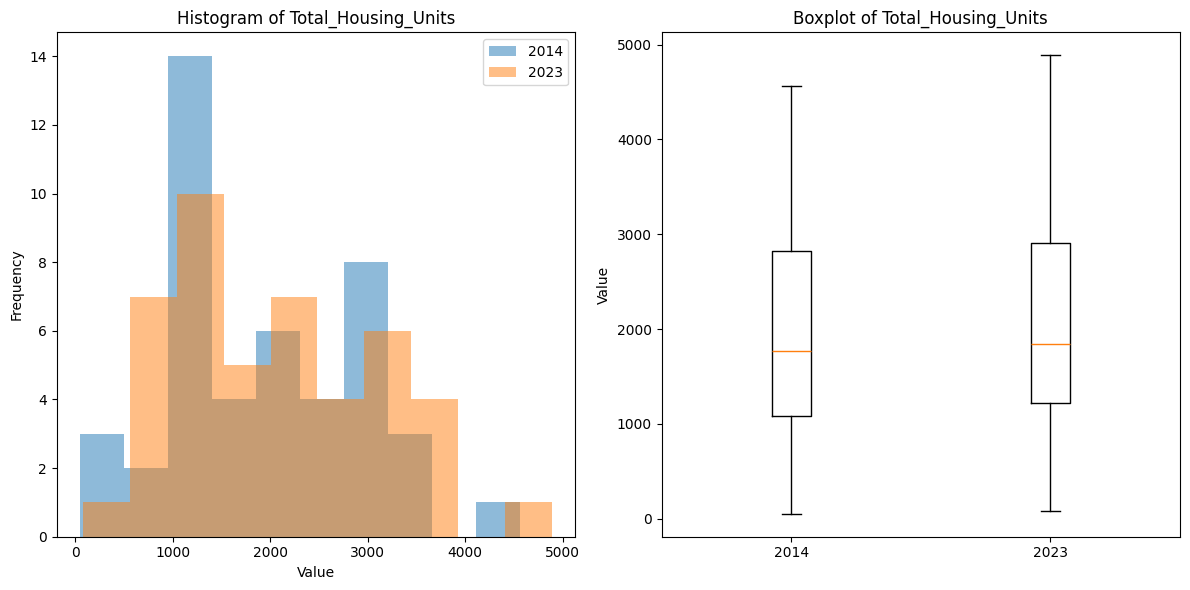

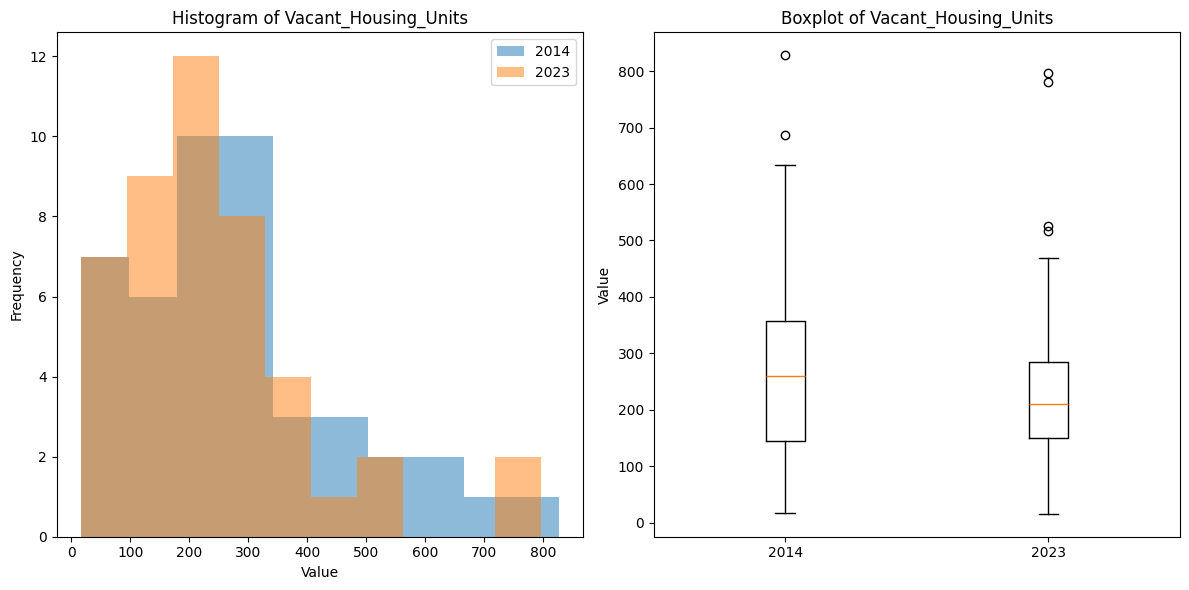

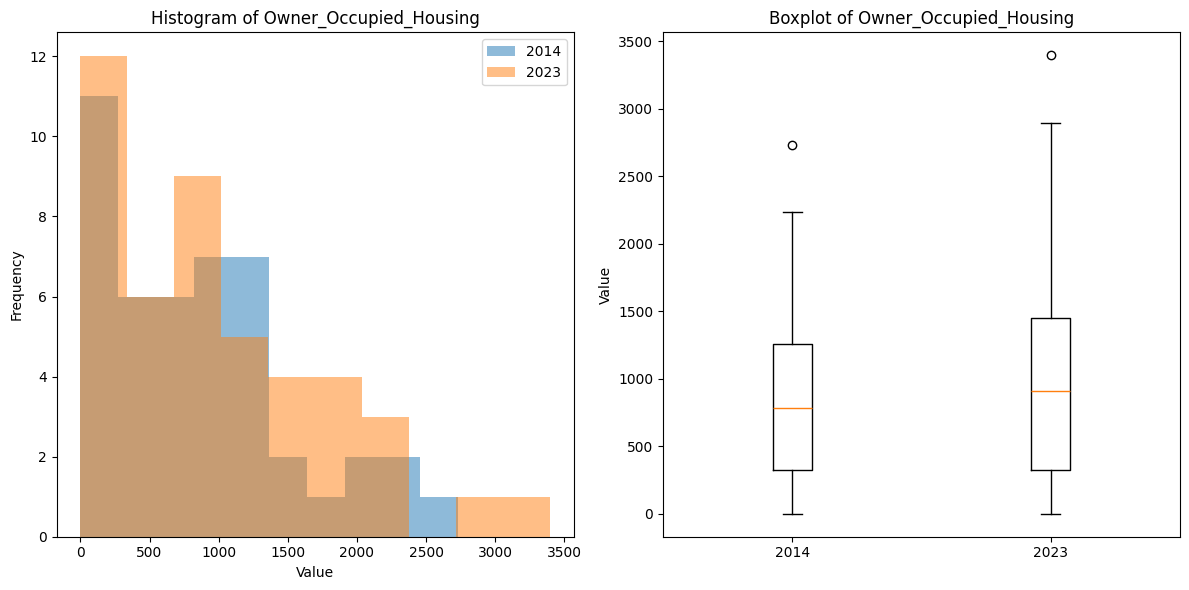

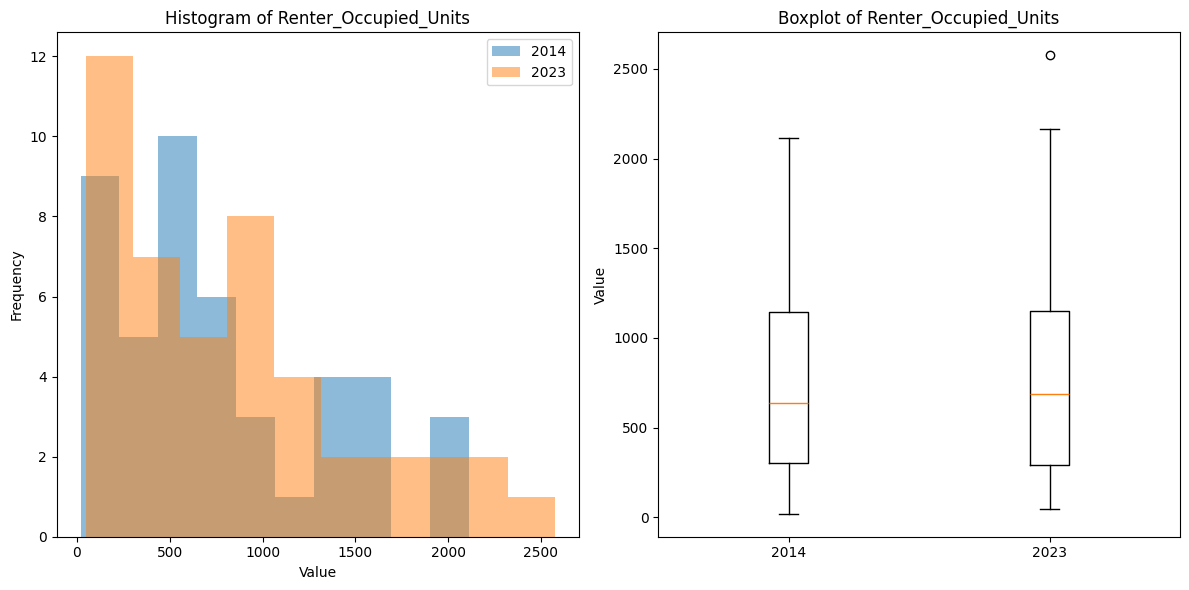

In [19]:
variables = ['Total_Housing_Units', 'Vacant_Housing_Units', 'Owner_Occupied_Housing', 'Renter_Occupied_Units']
for variable in variables:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(total_vac[f'{variable}_2014'], bins=10, alpha=0.5, label='2014')
    plt.hist(total_vac[f'{variable}_2023'], bins=10, alpha=0.5, label='2023')
    plt.title(f'Histogram of {variable}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot([total_vac[f'{variable}_2014'], total_vac[f'{variable}_2023']], labels=['2014', '2023'])
    plt.title(f'Boxplot of {variable}')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

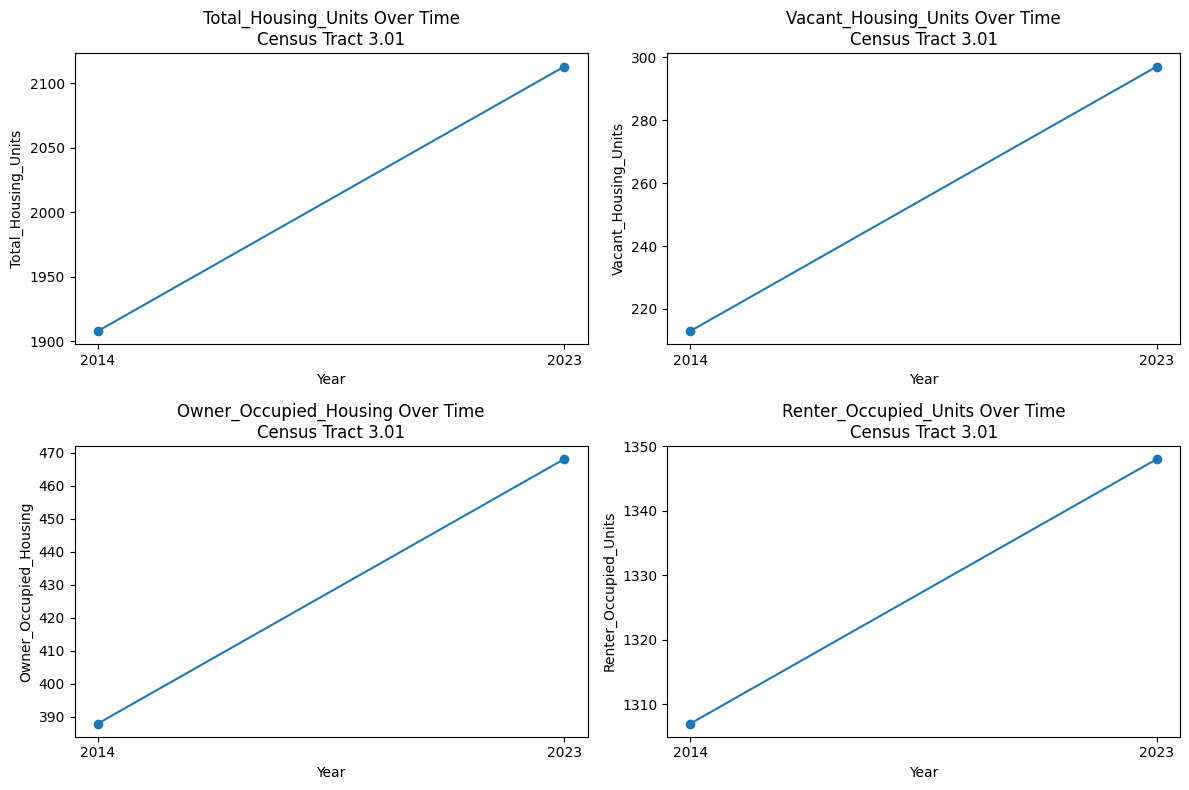

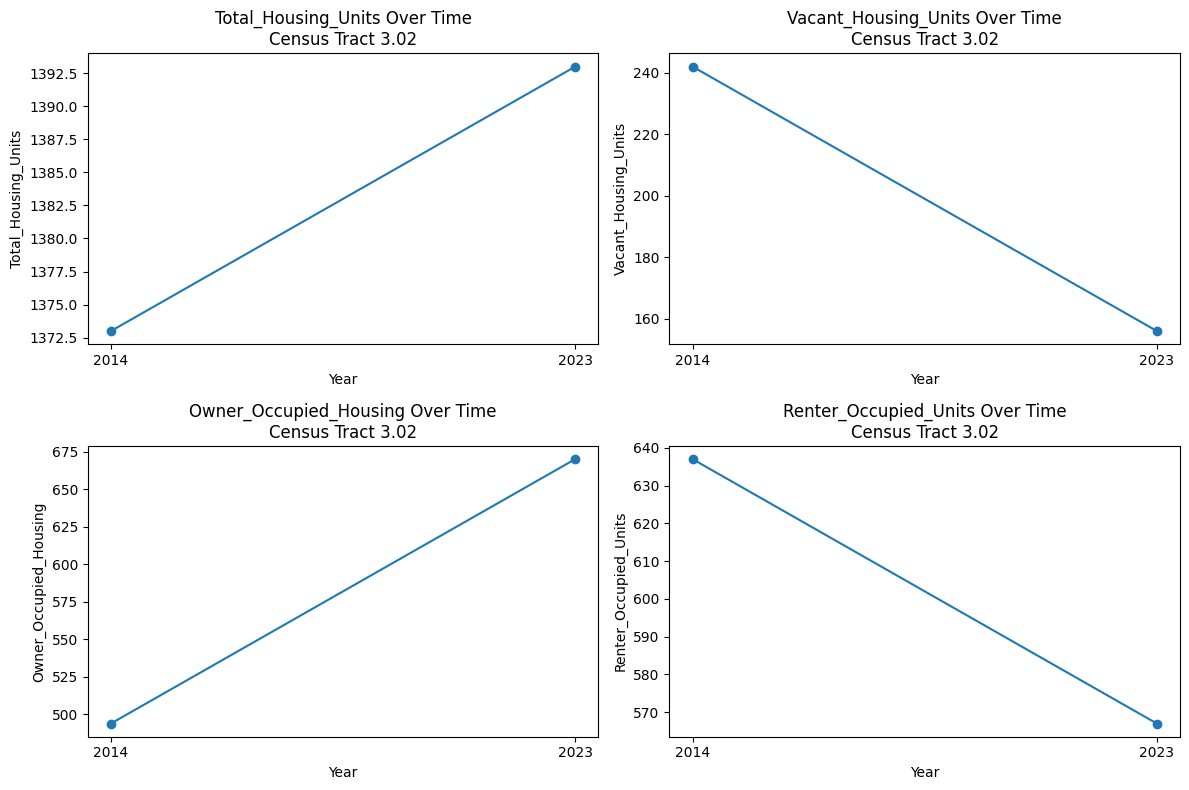

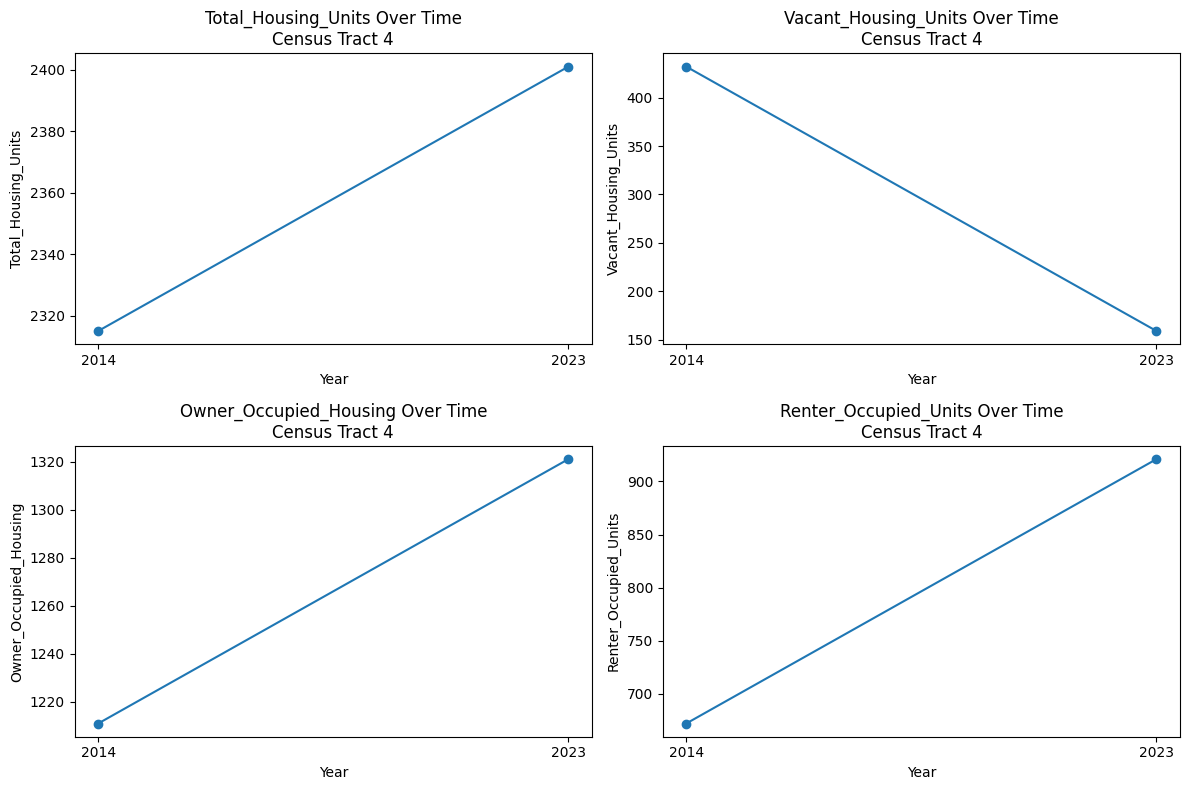

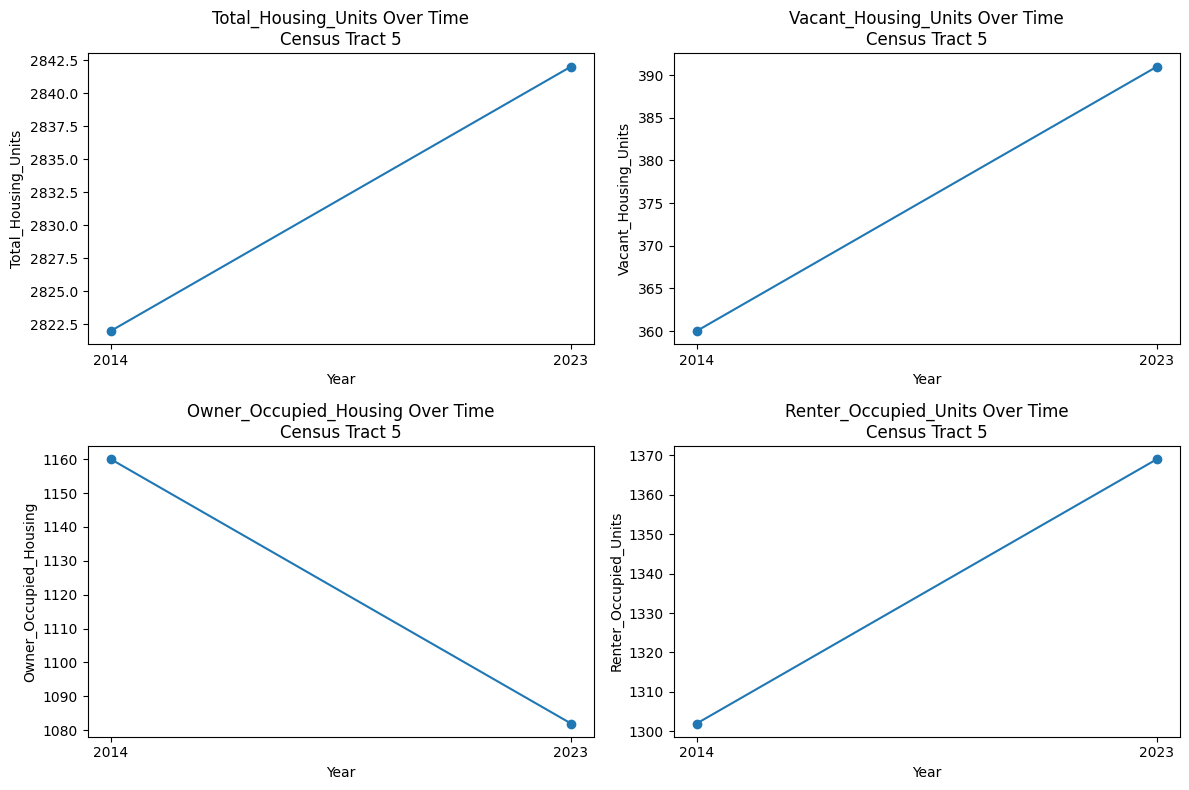

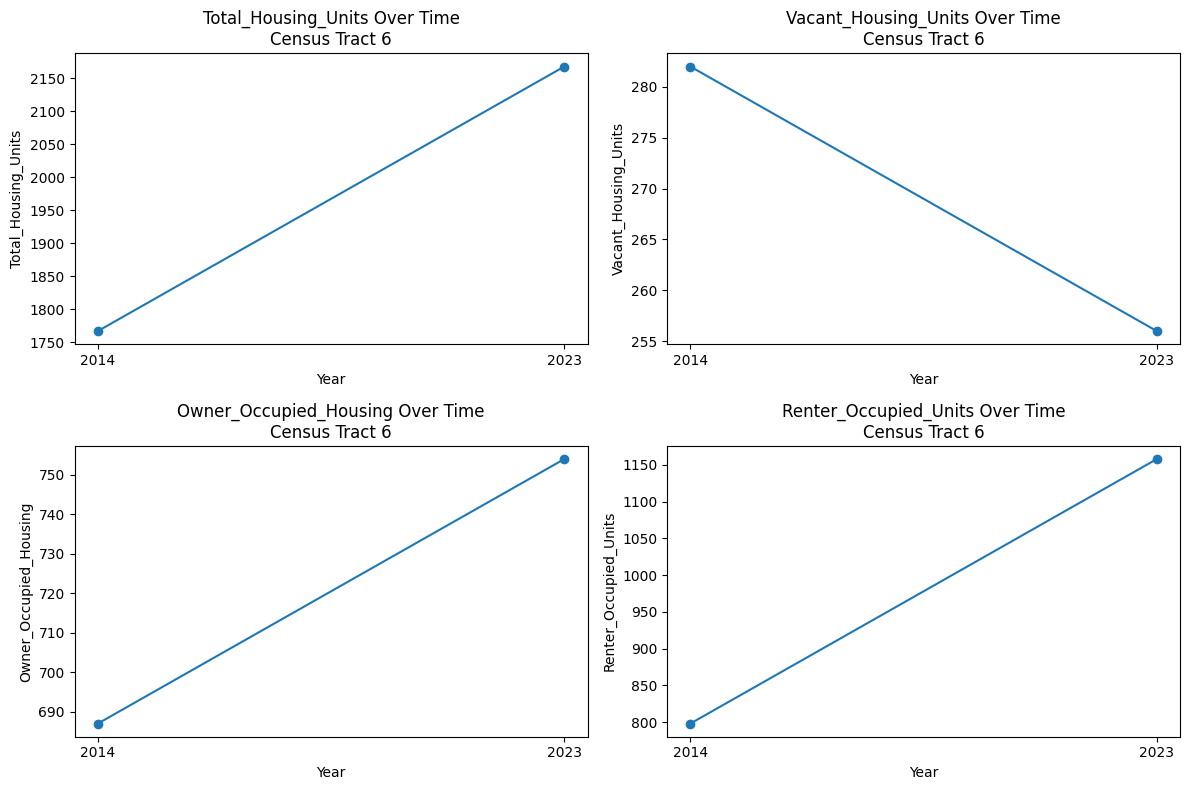

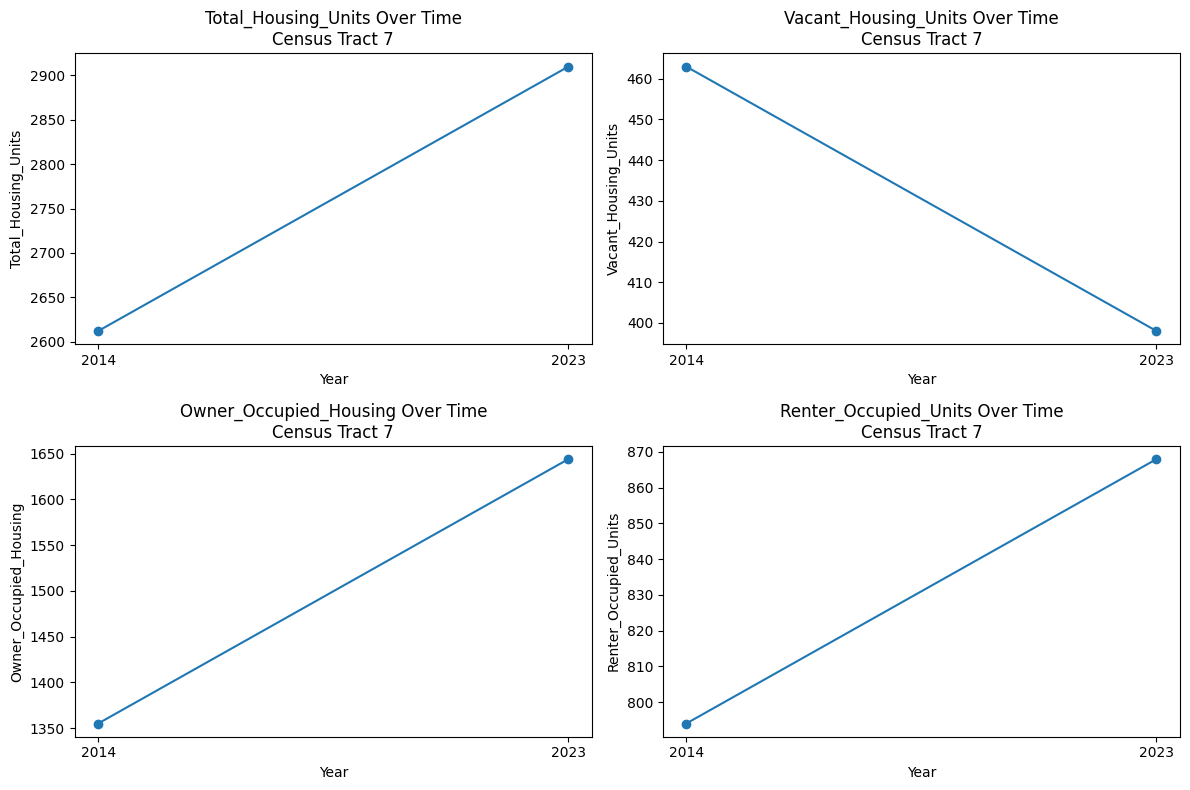

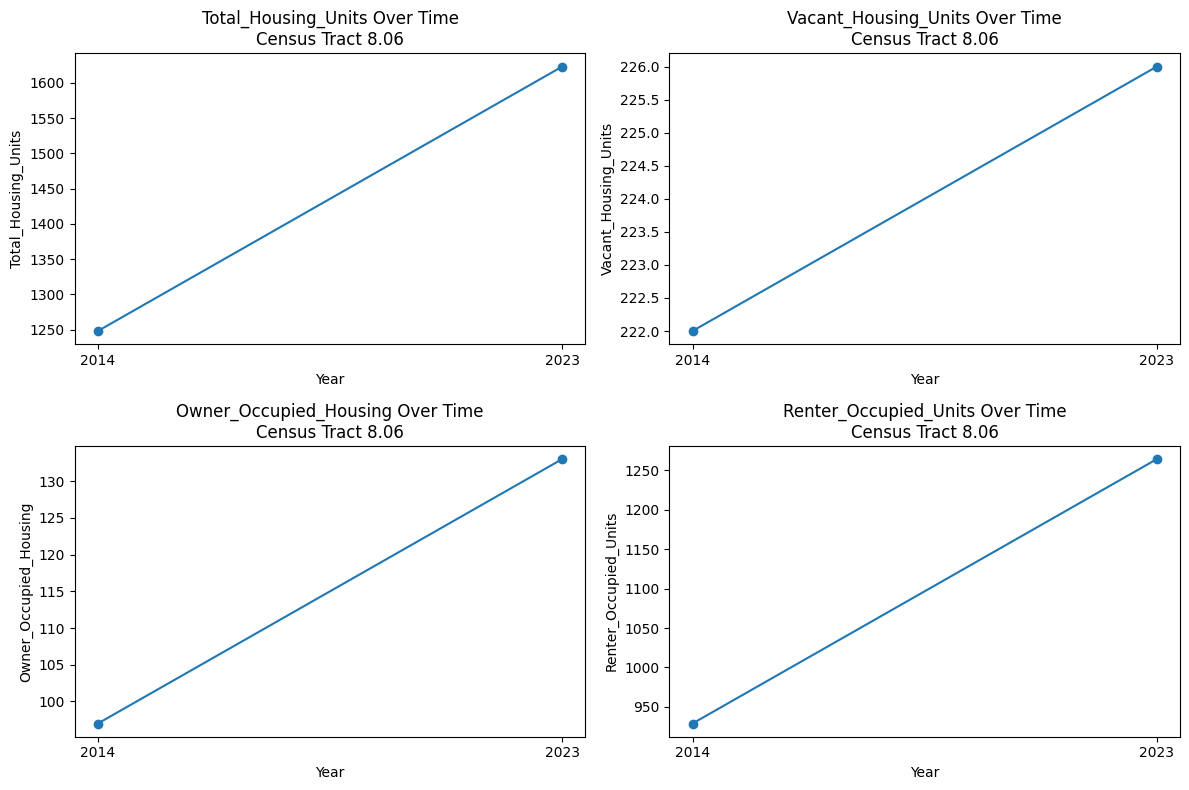

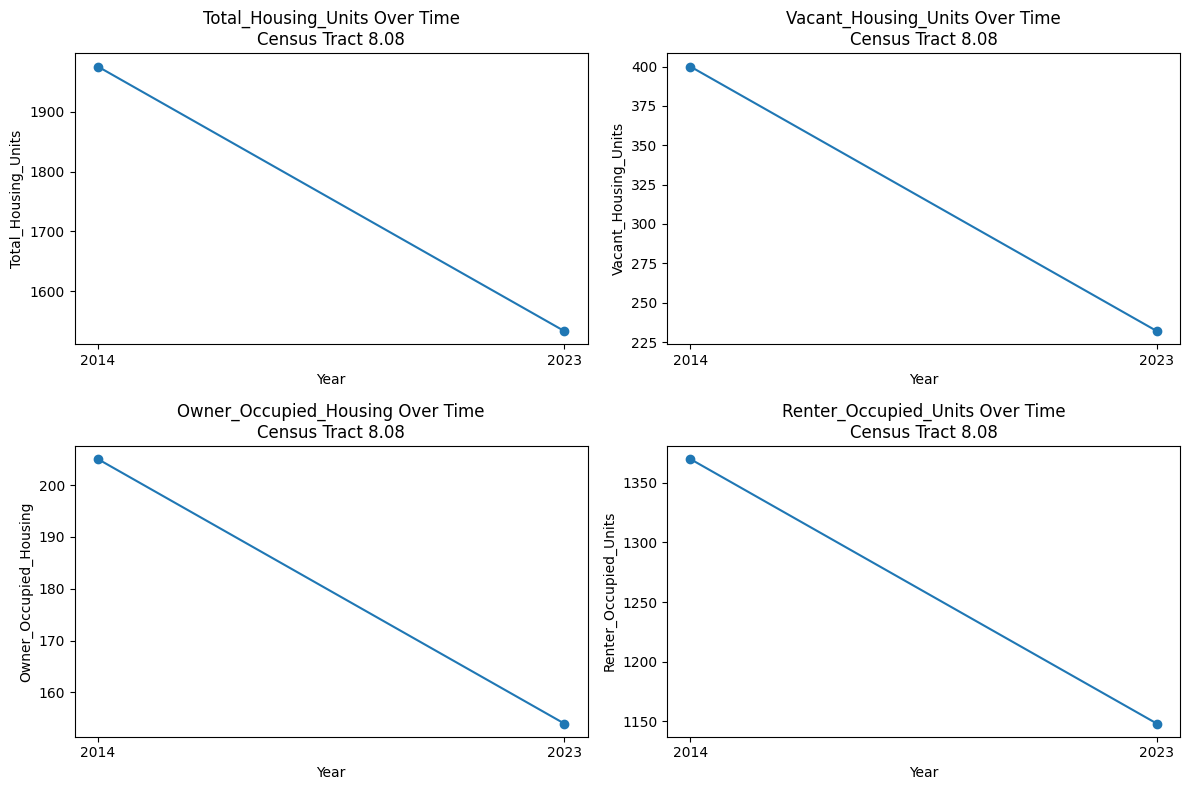

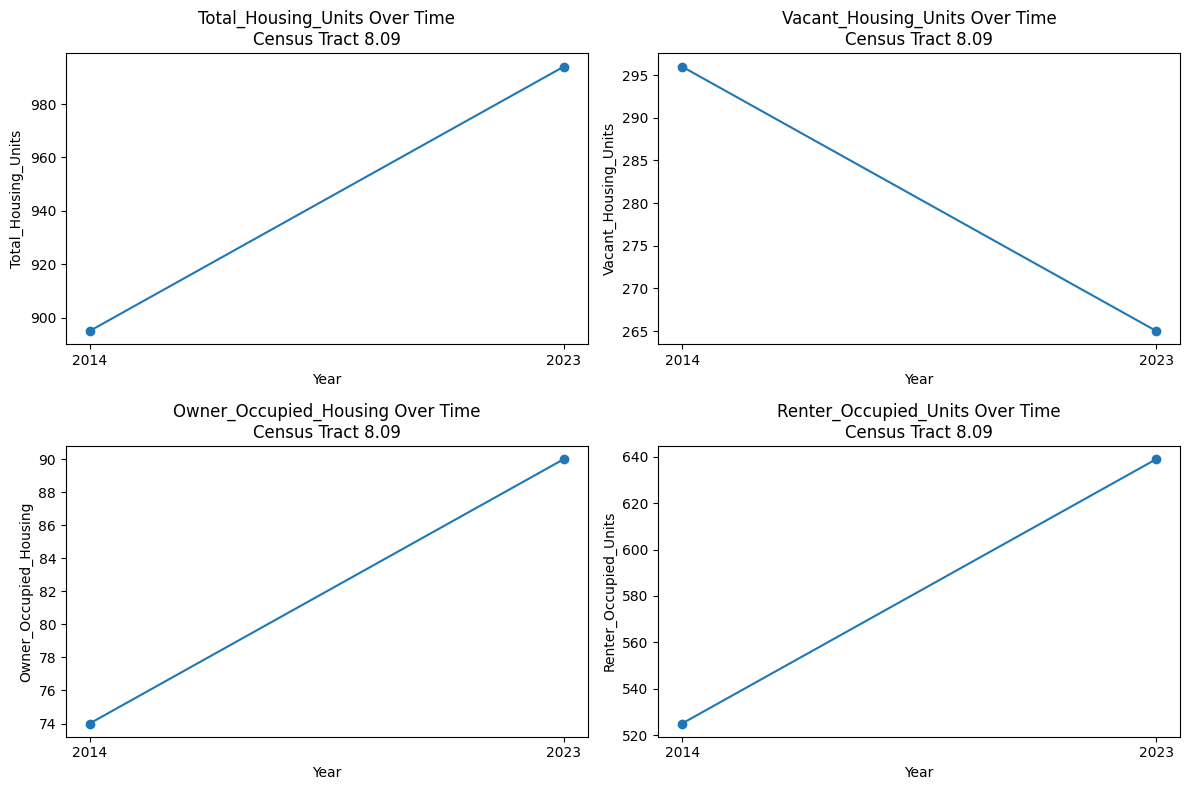

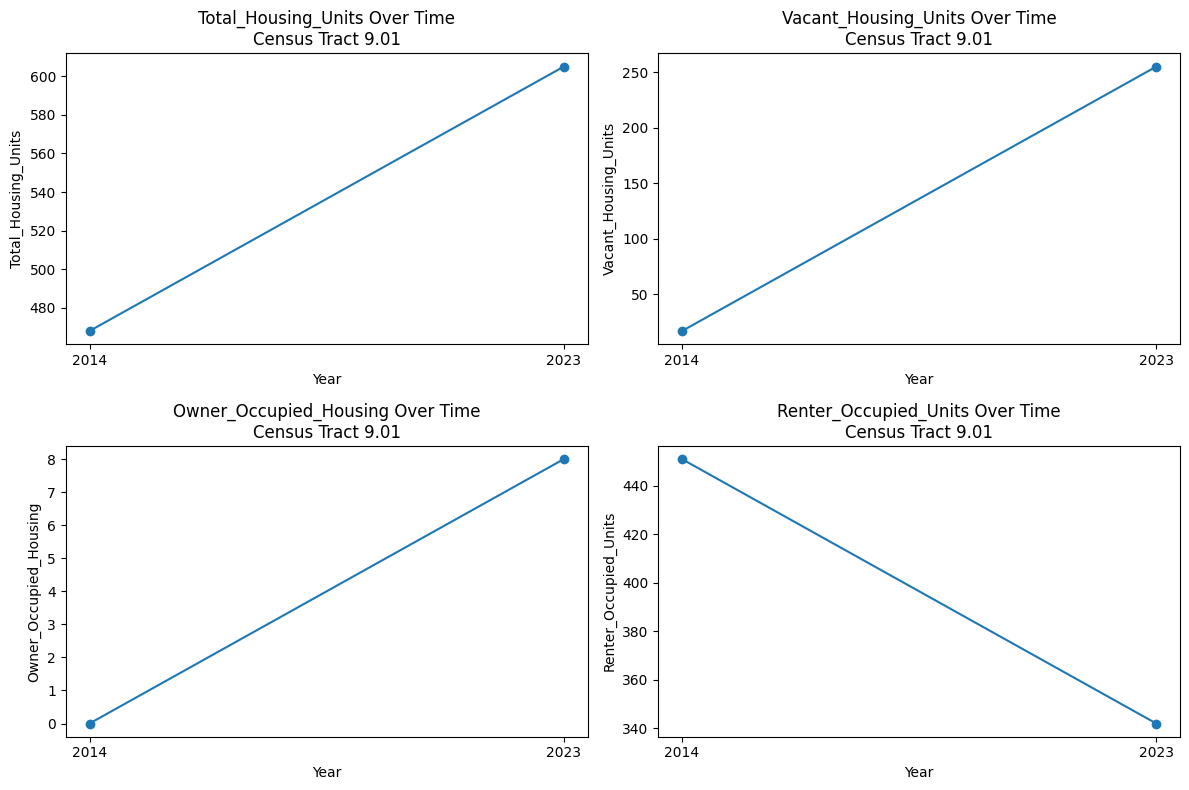

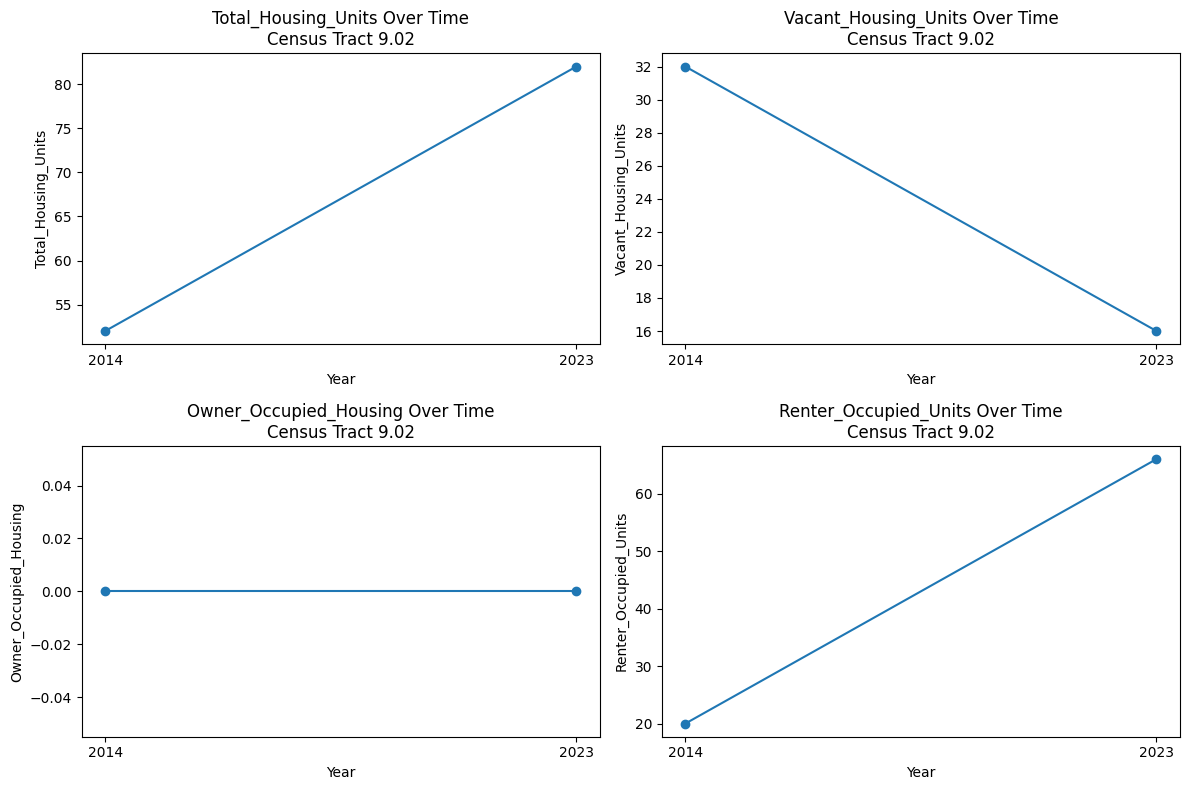

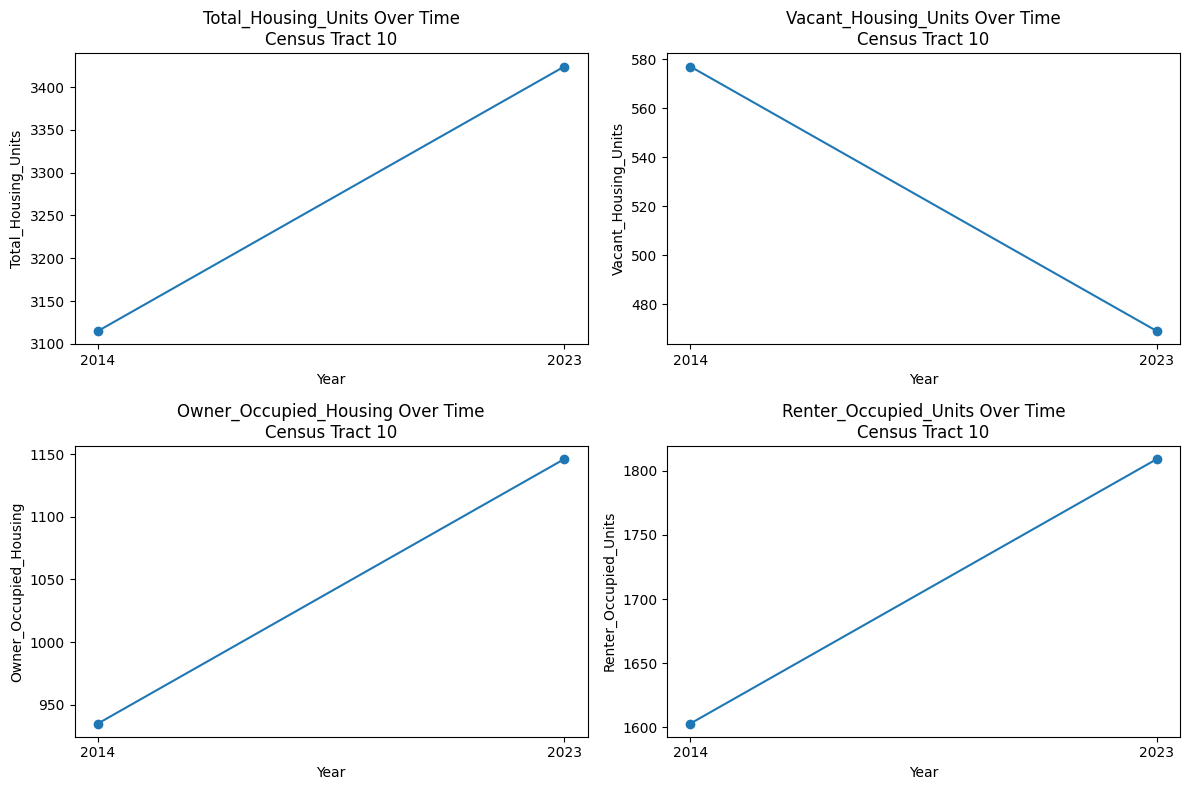

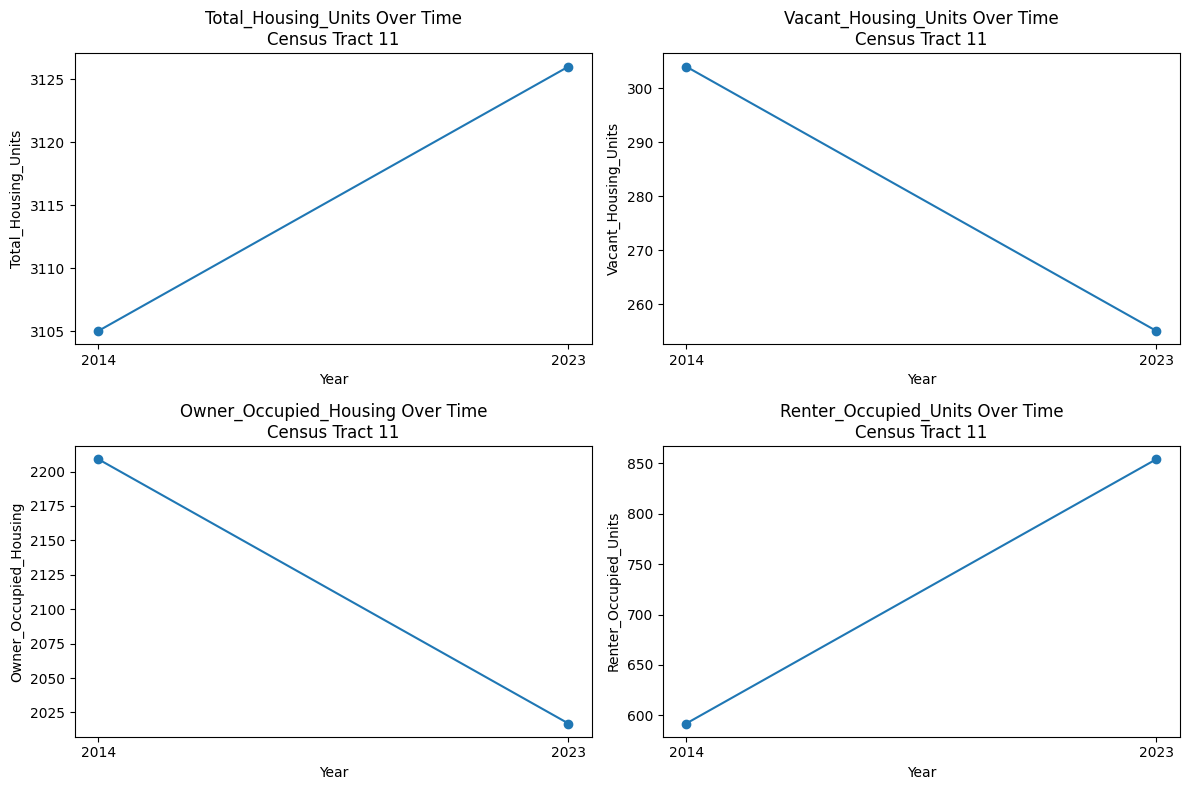

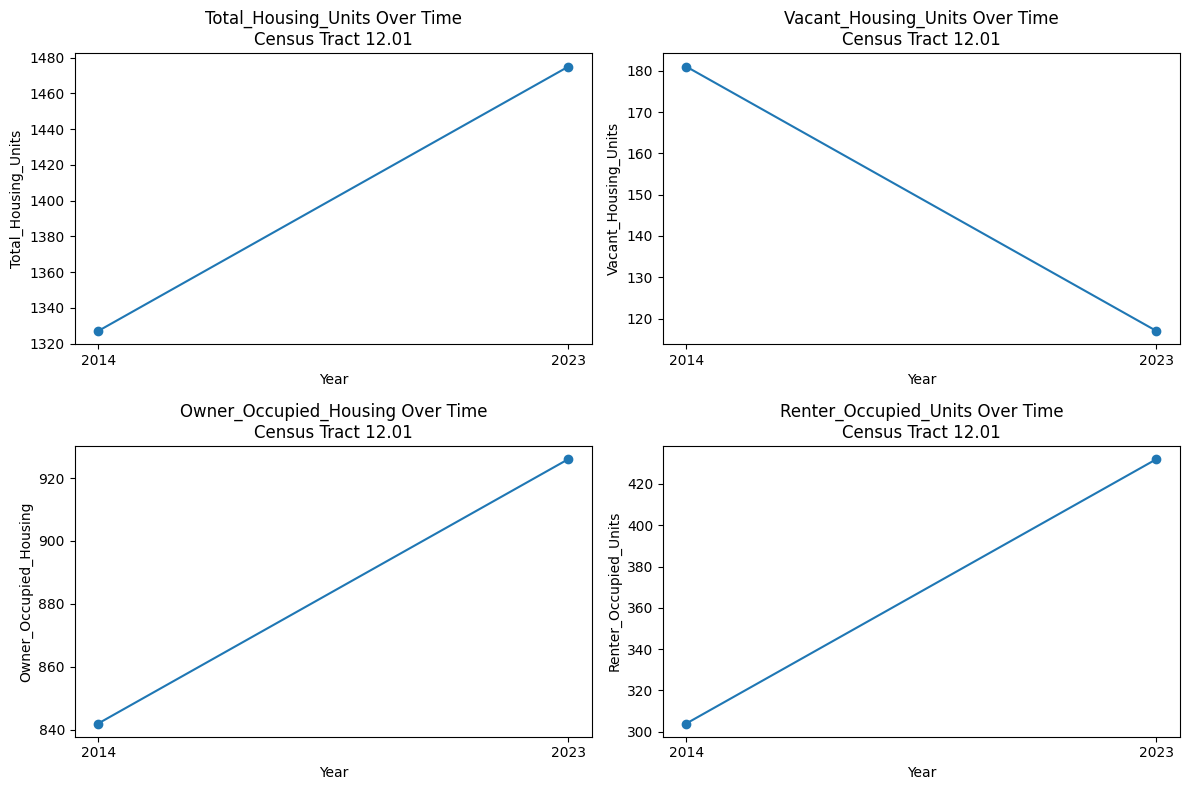

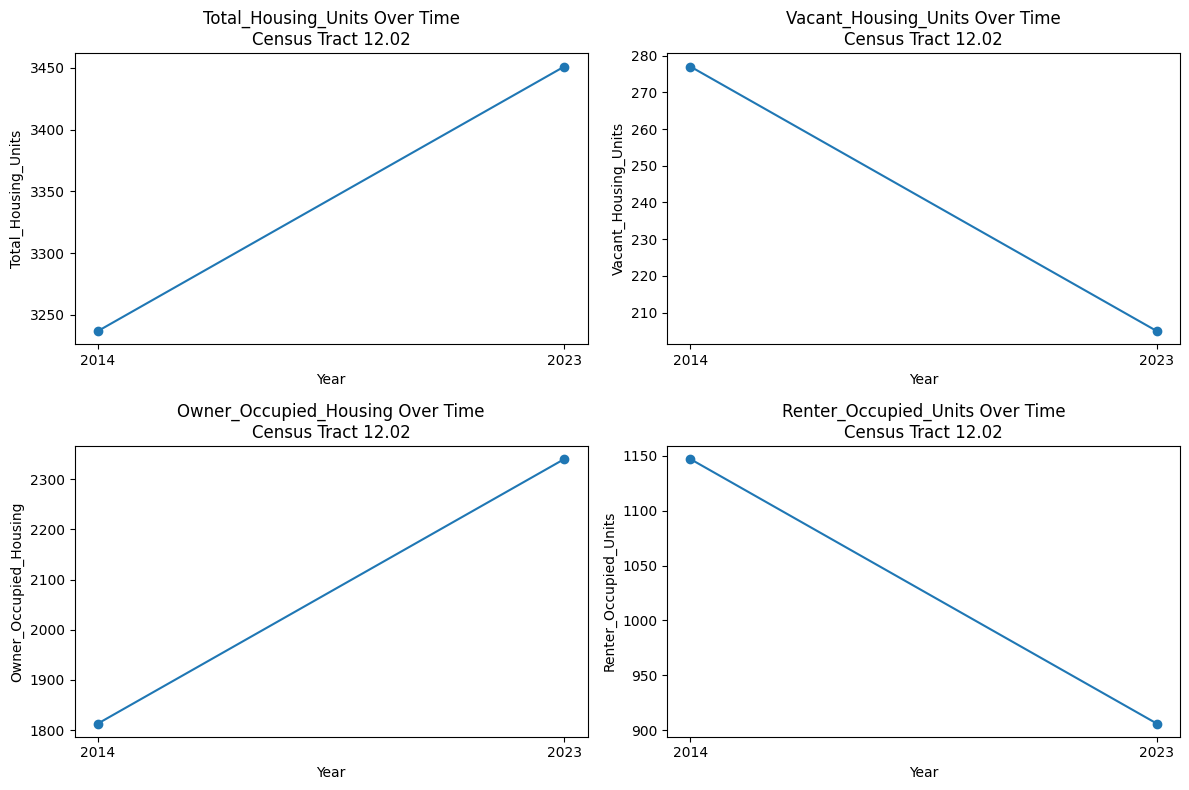

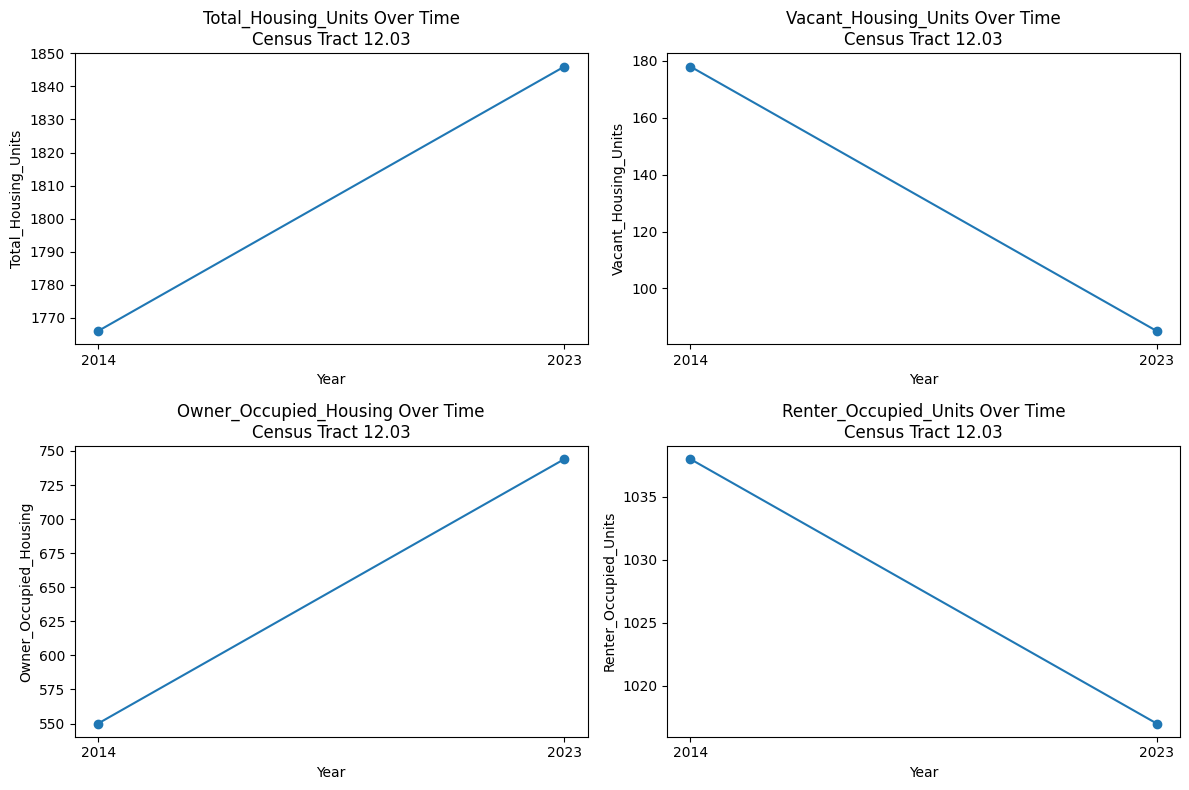

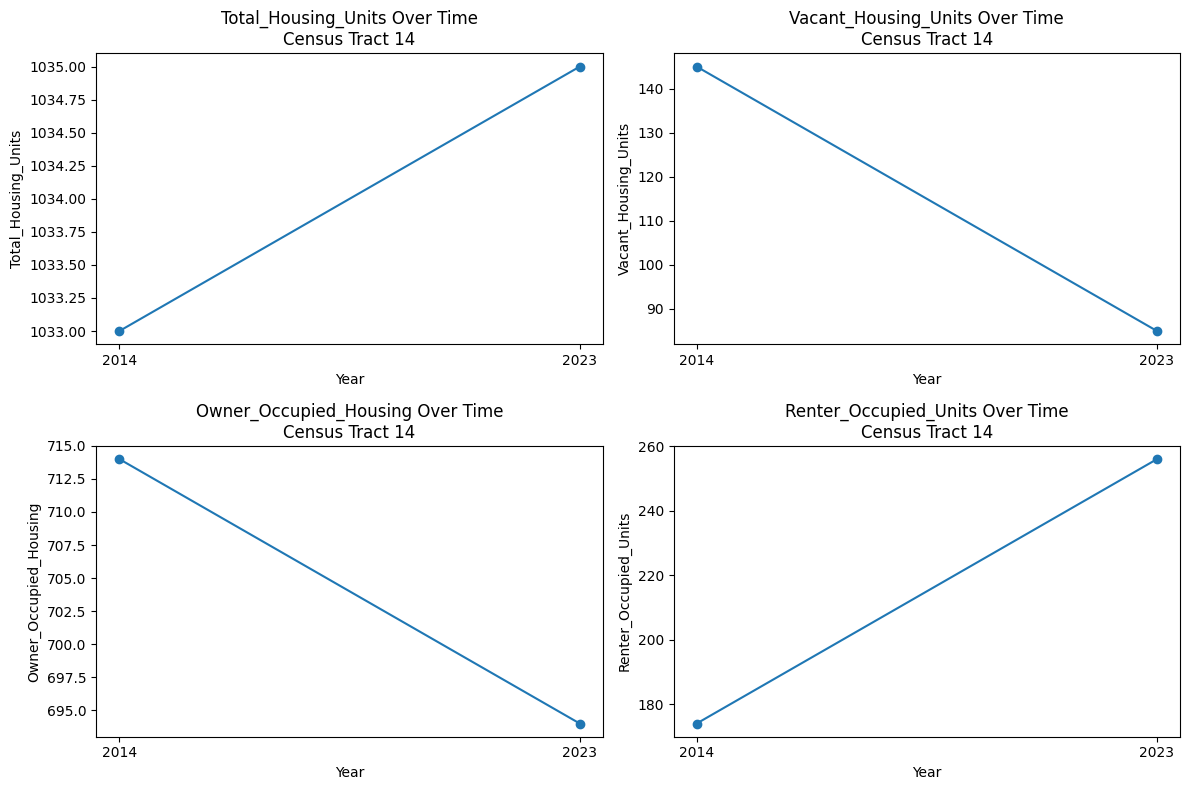

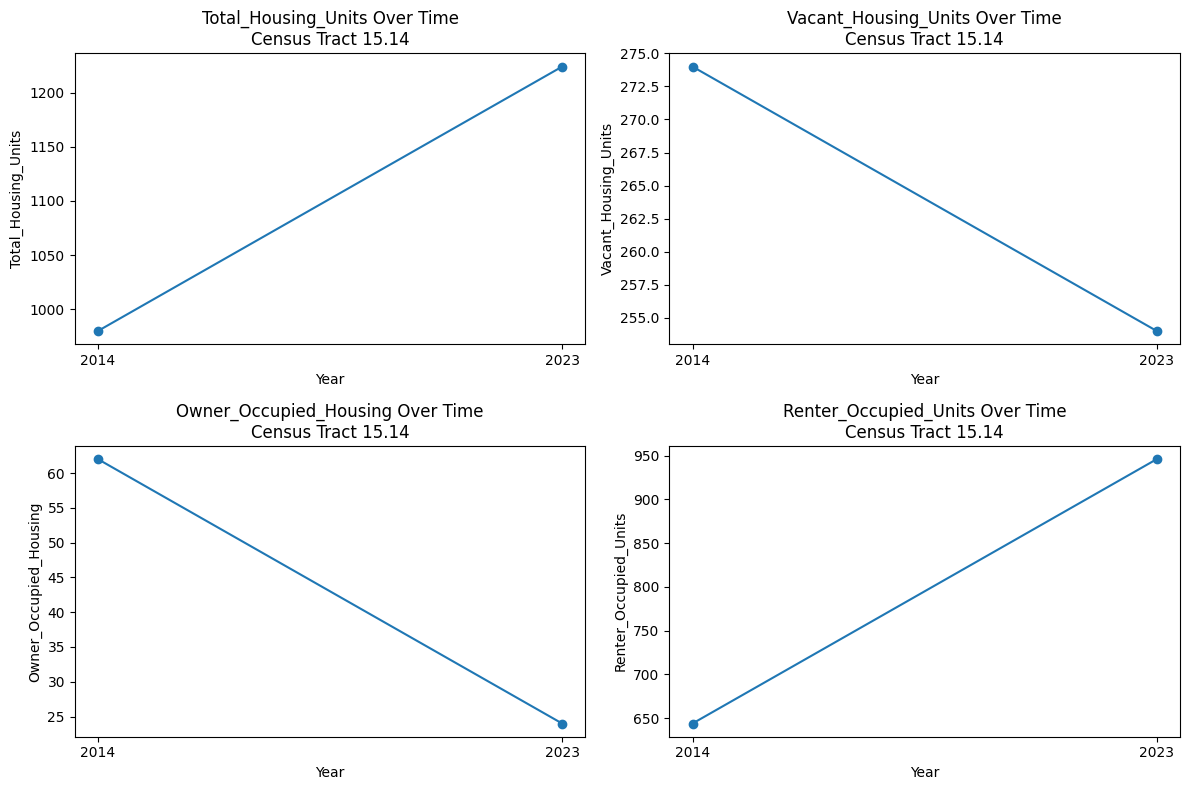

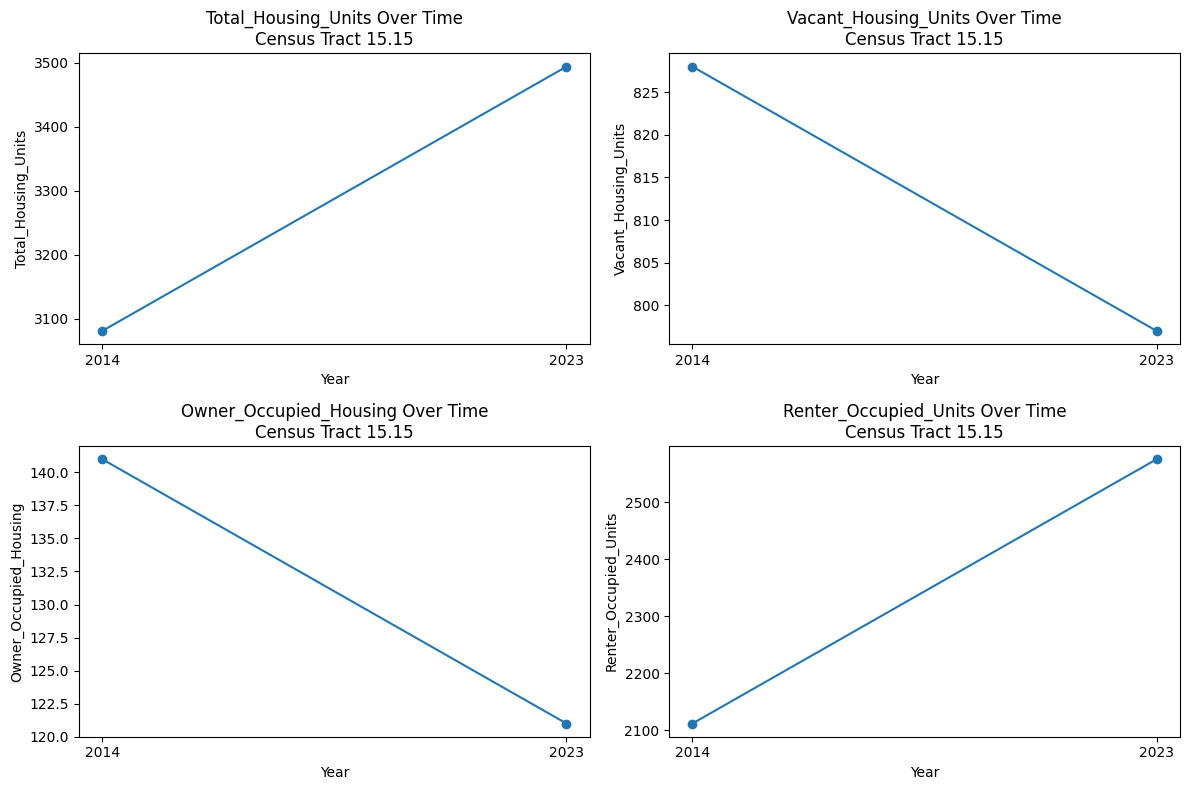

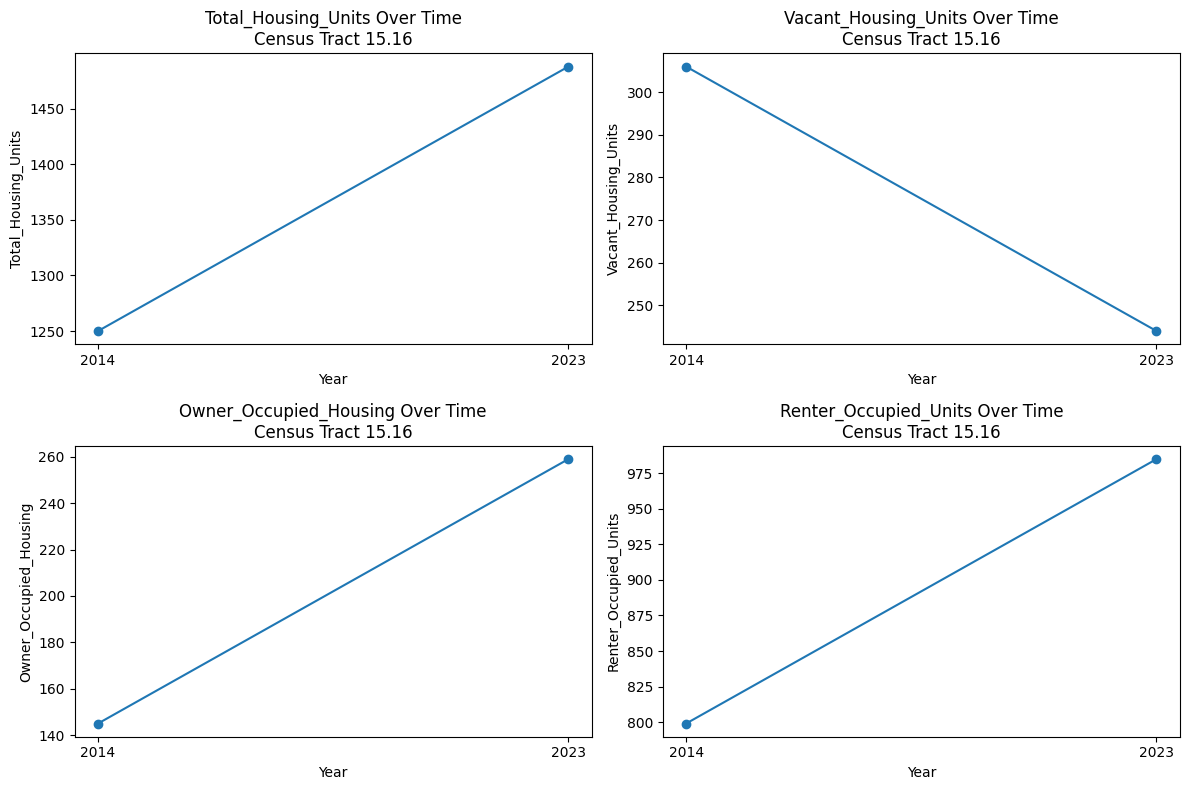

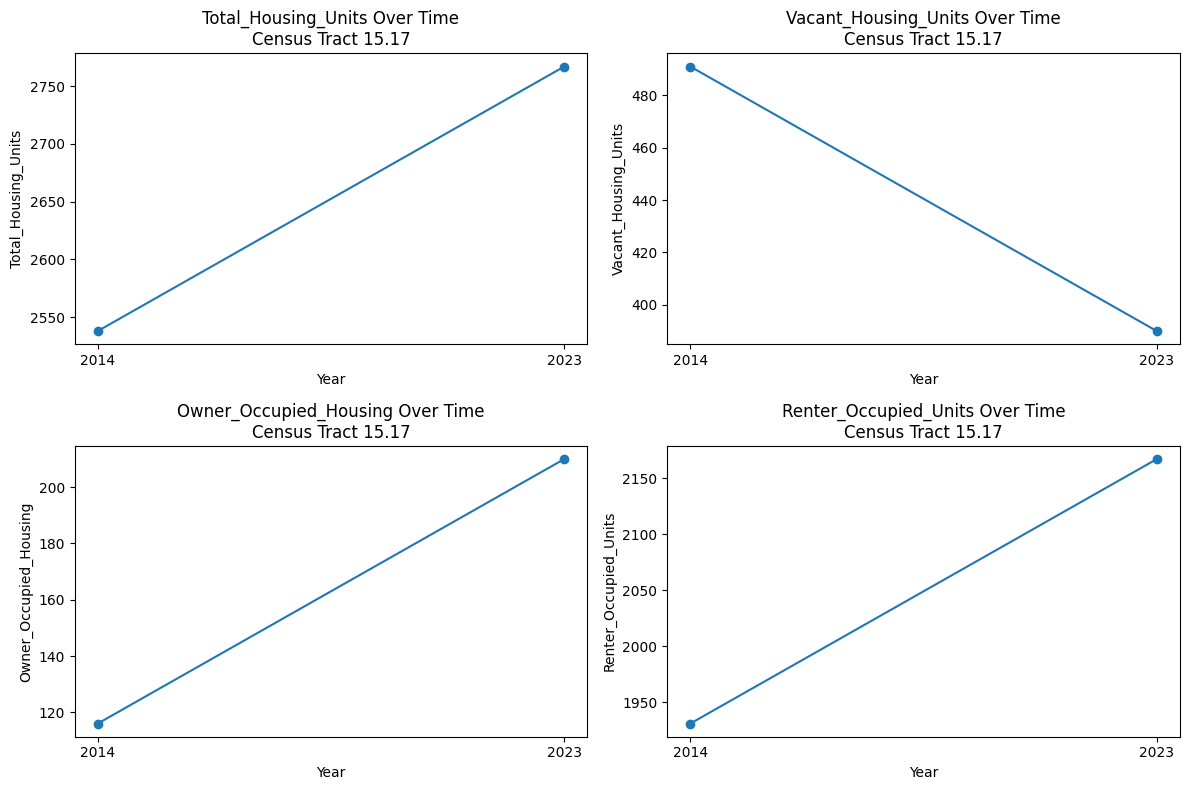

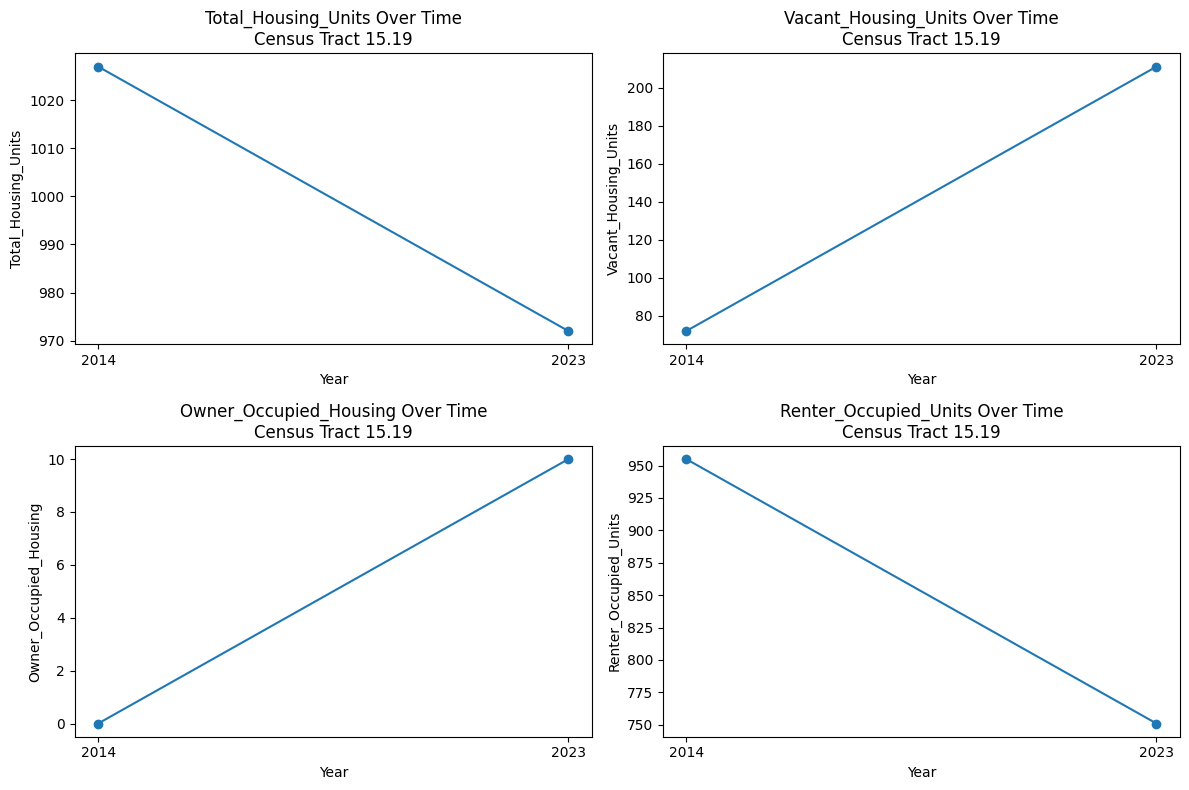

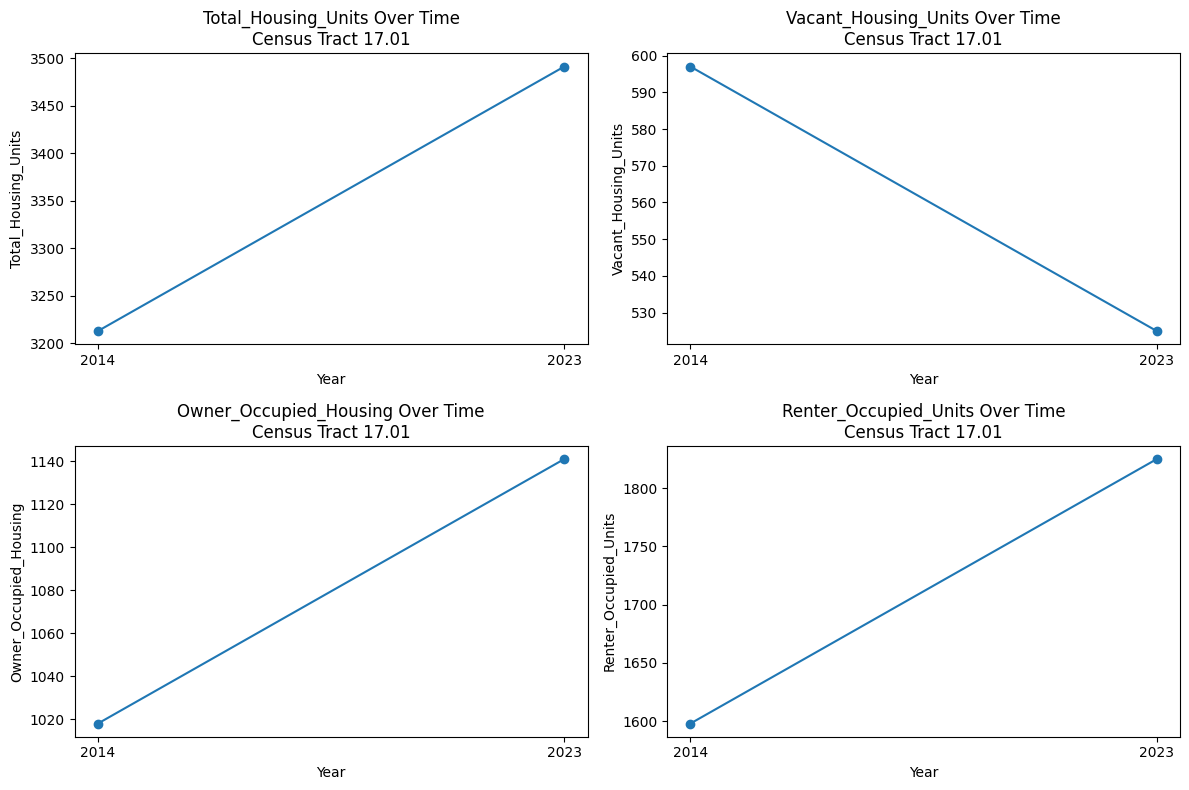

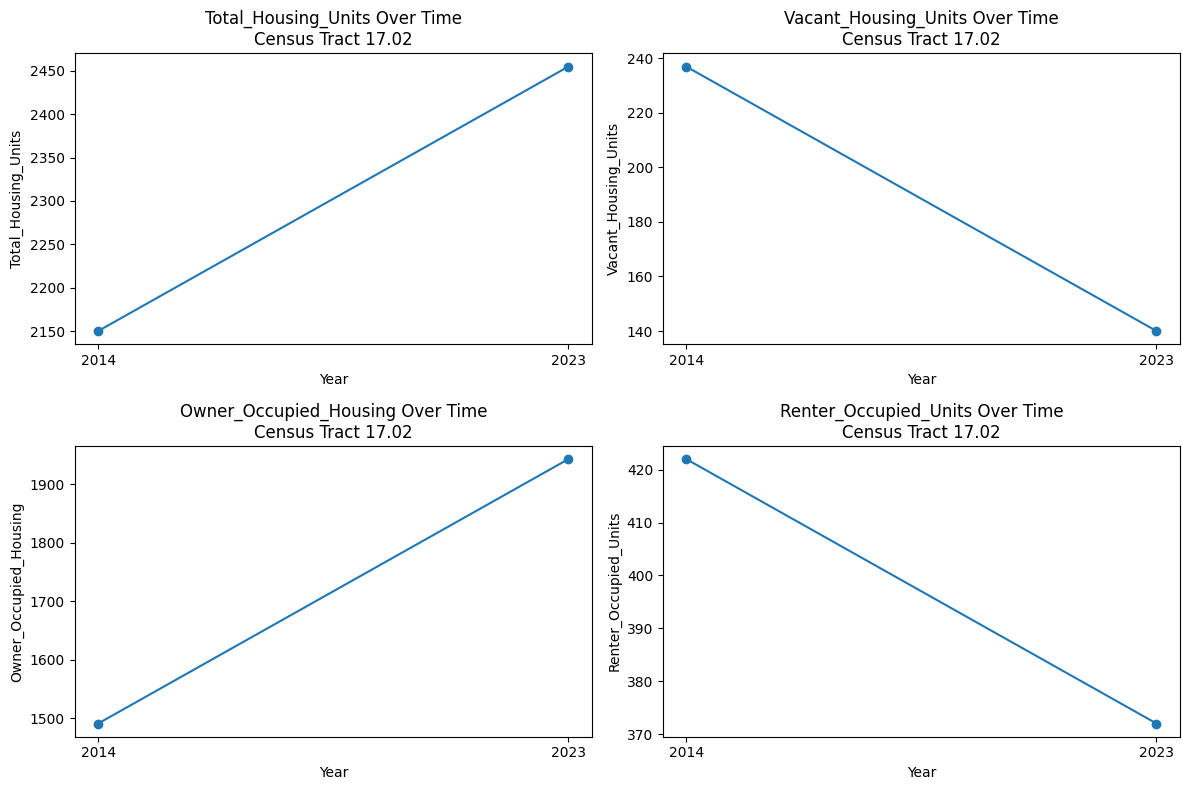

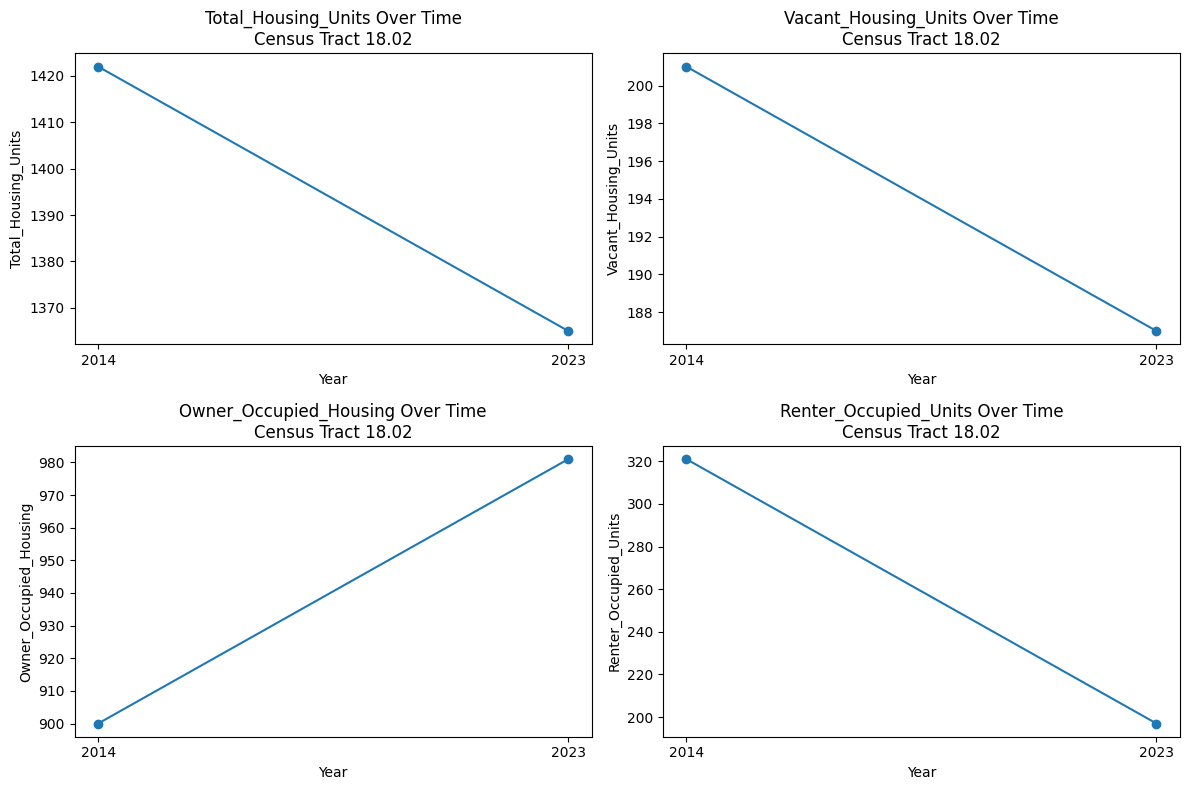

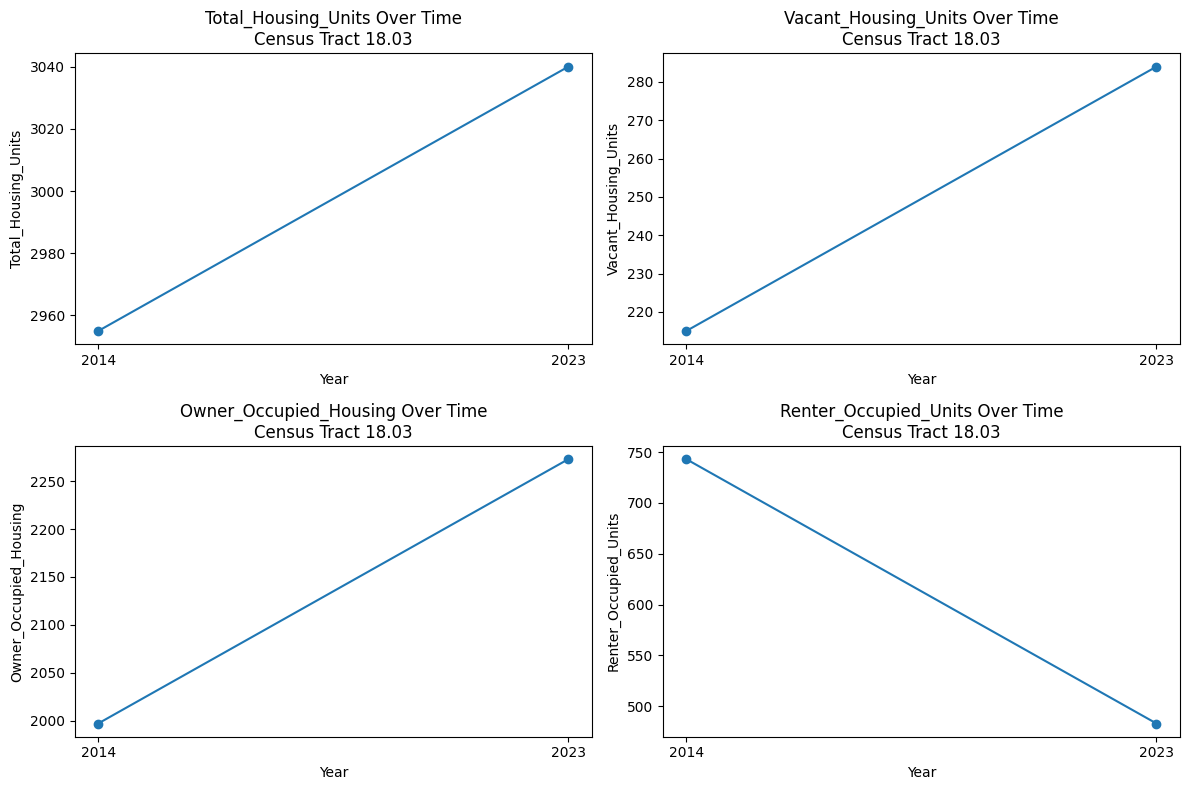

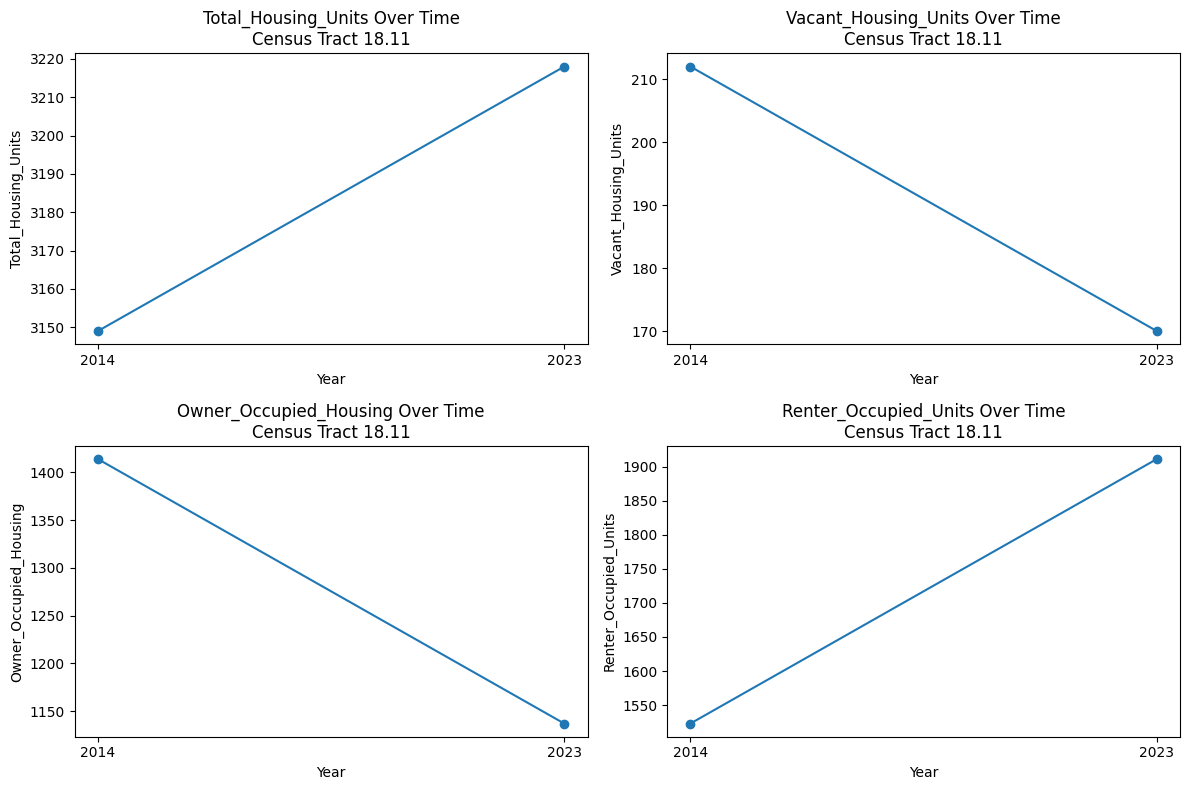

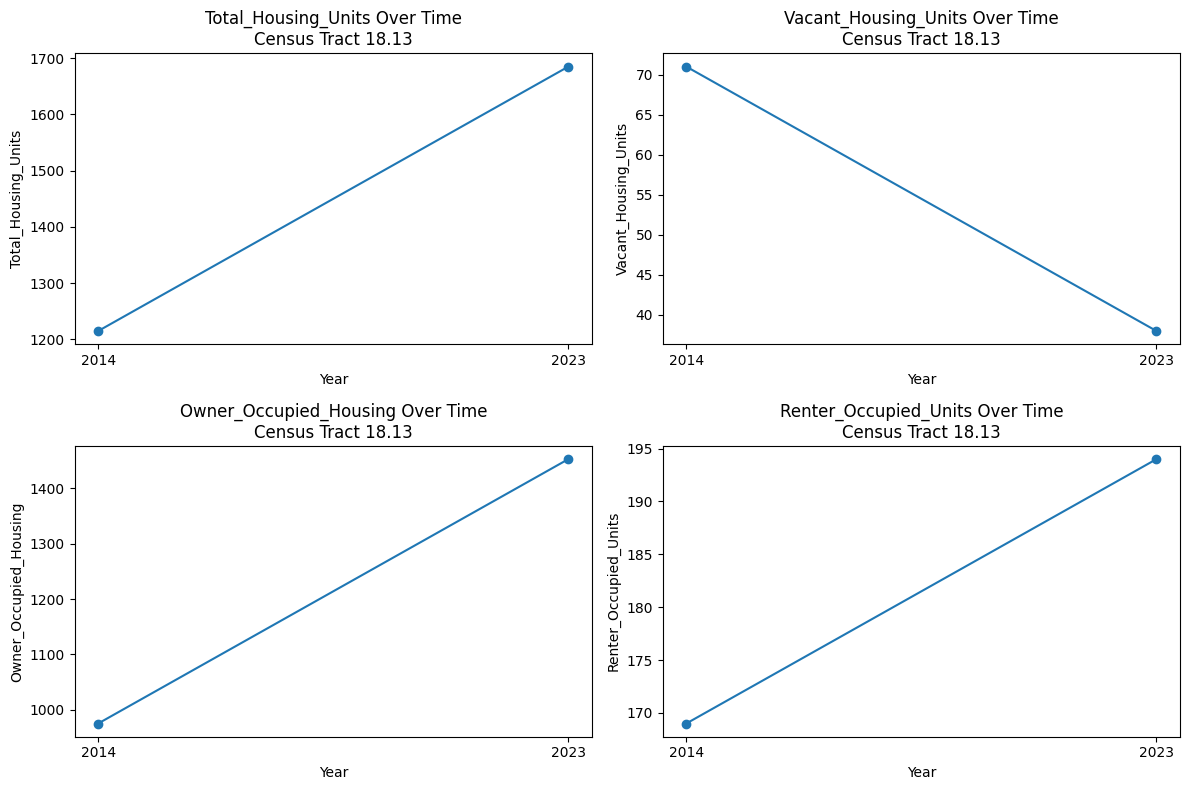

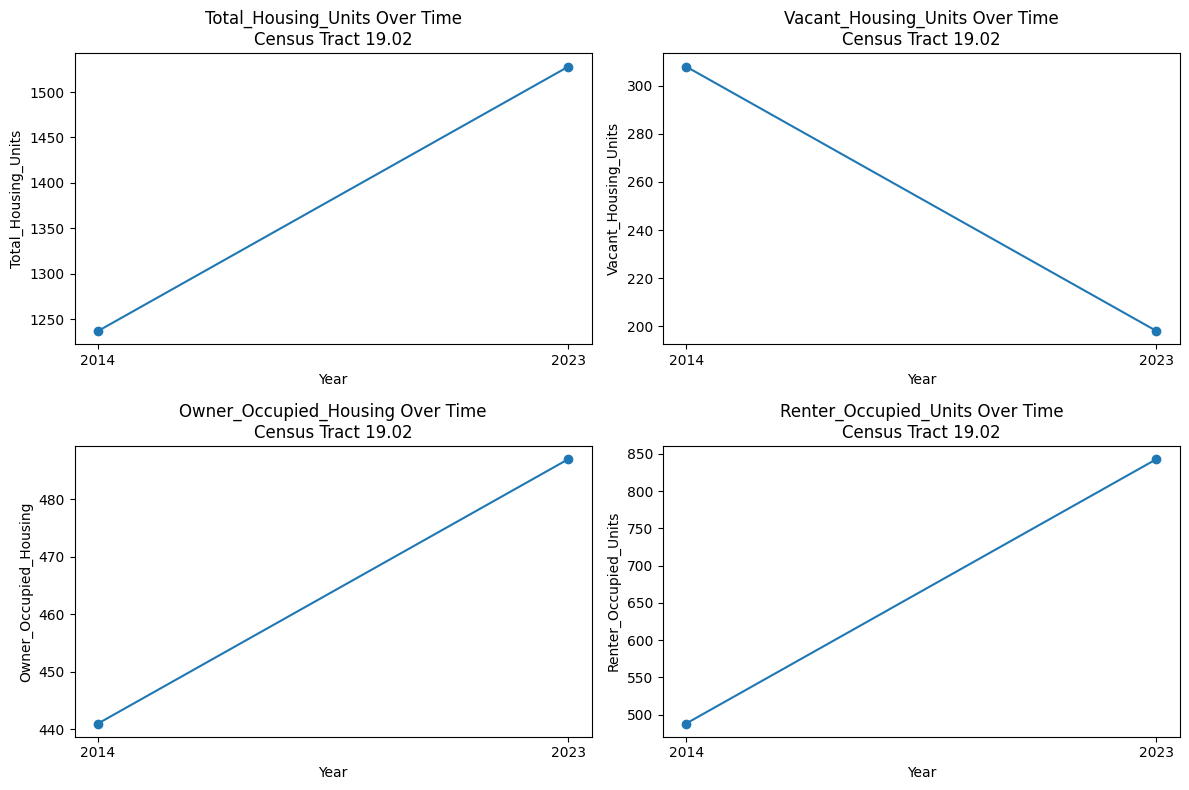

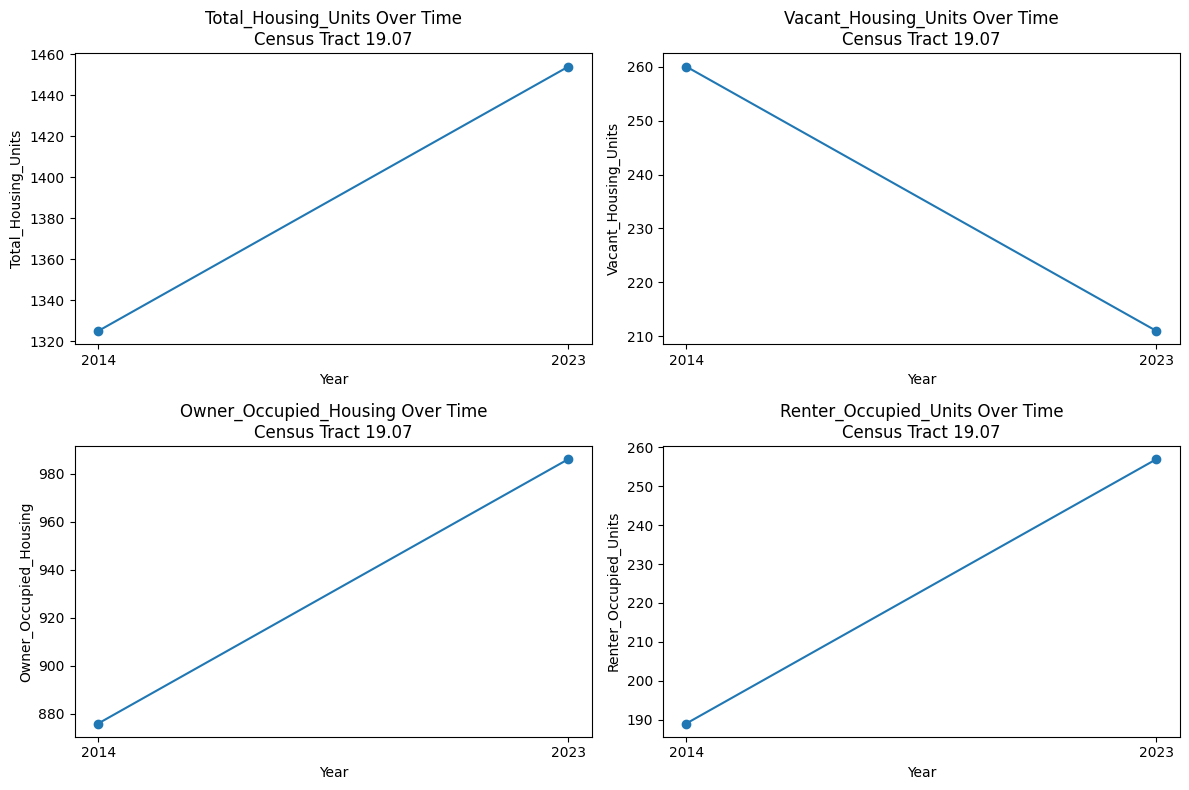

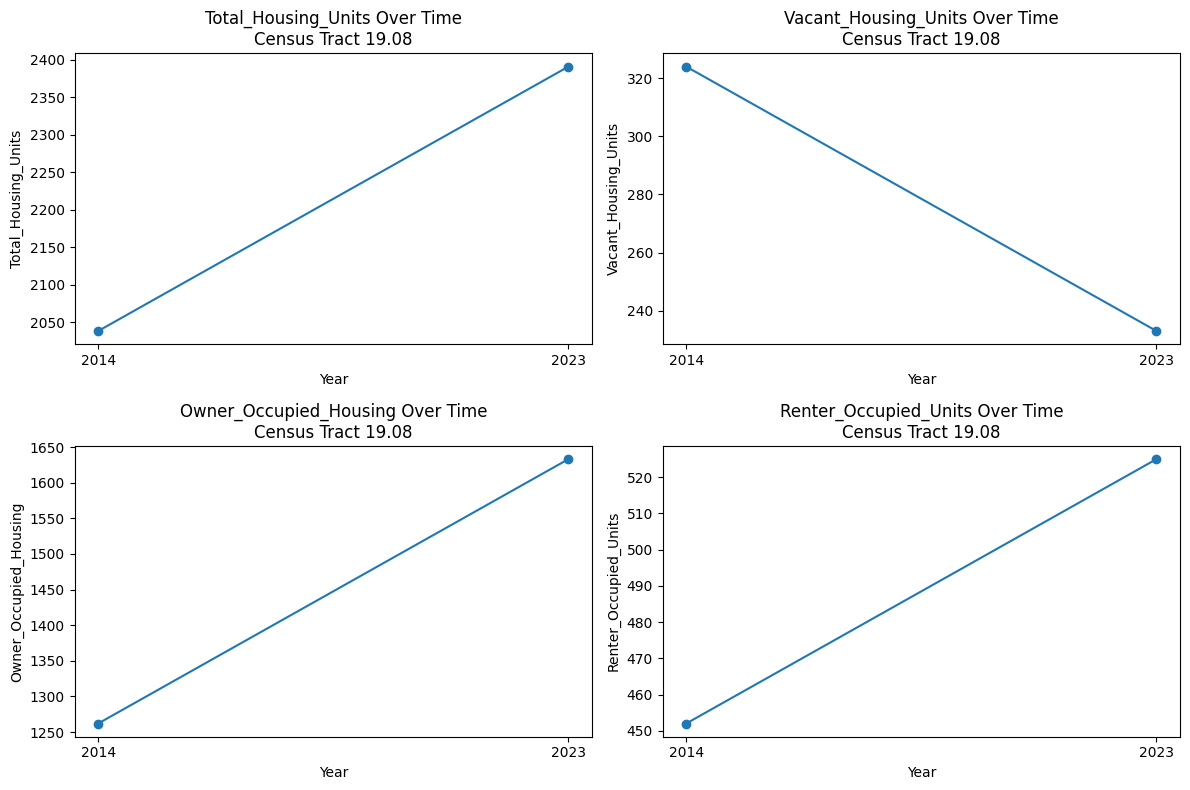

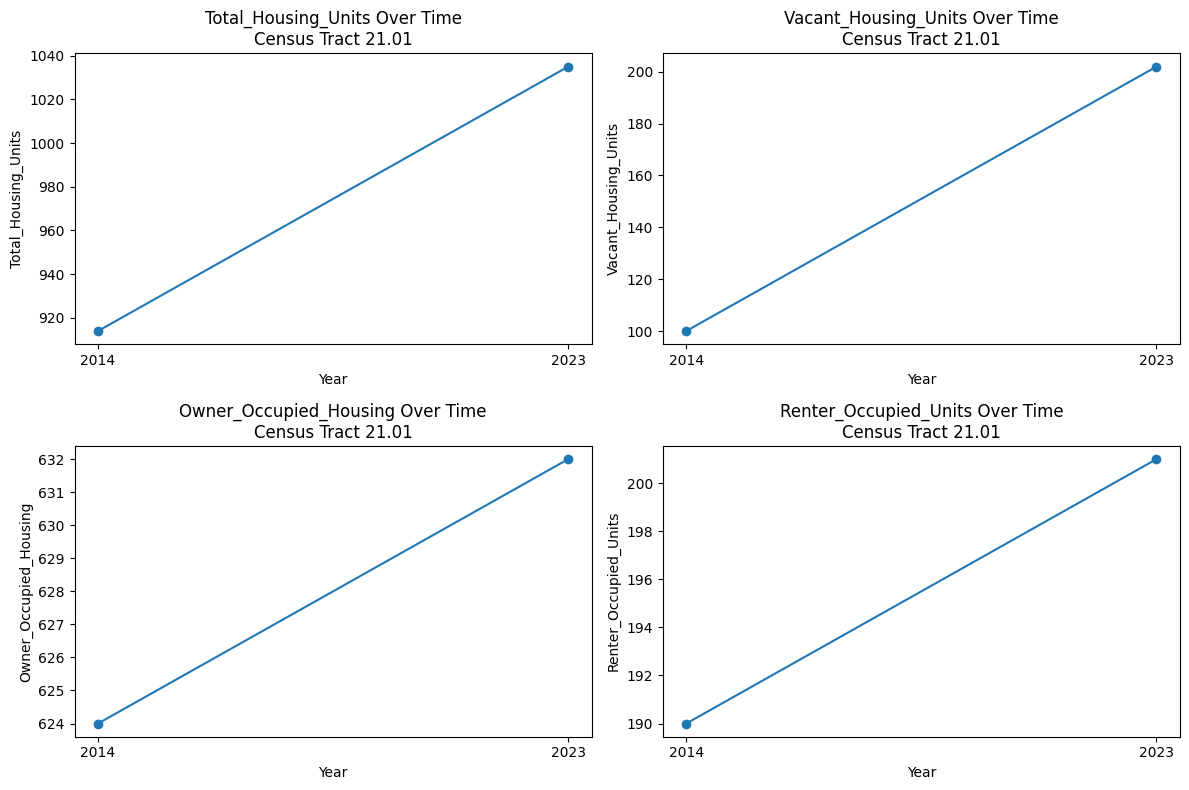

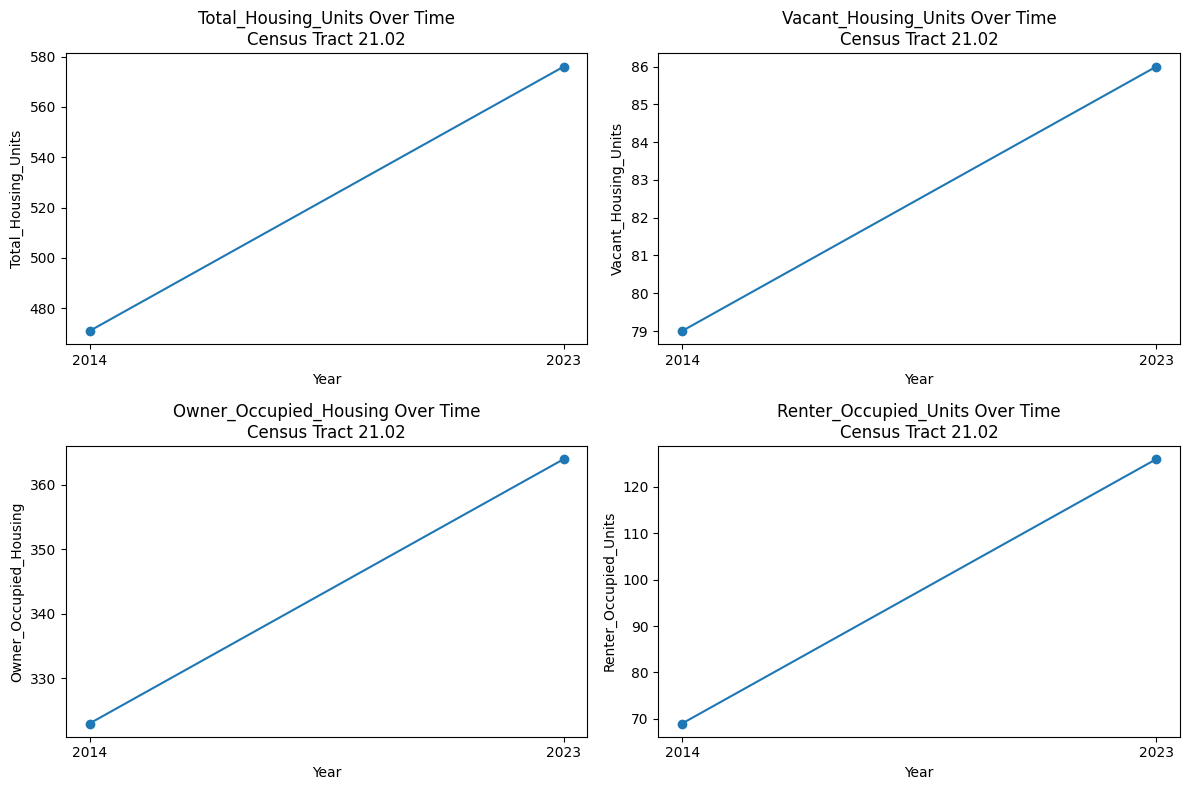

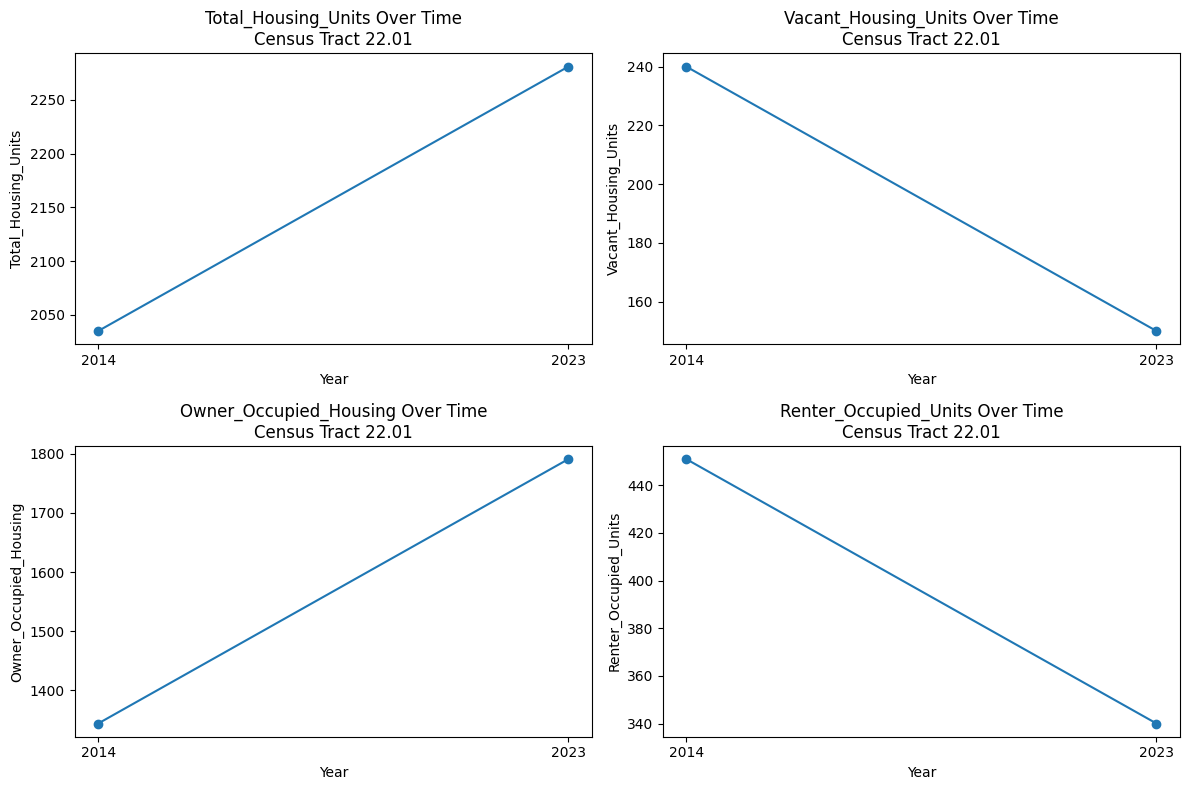

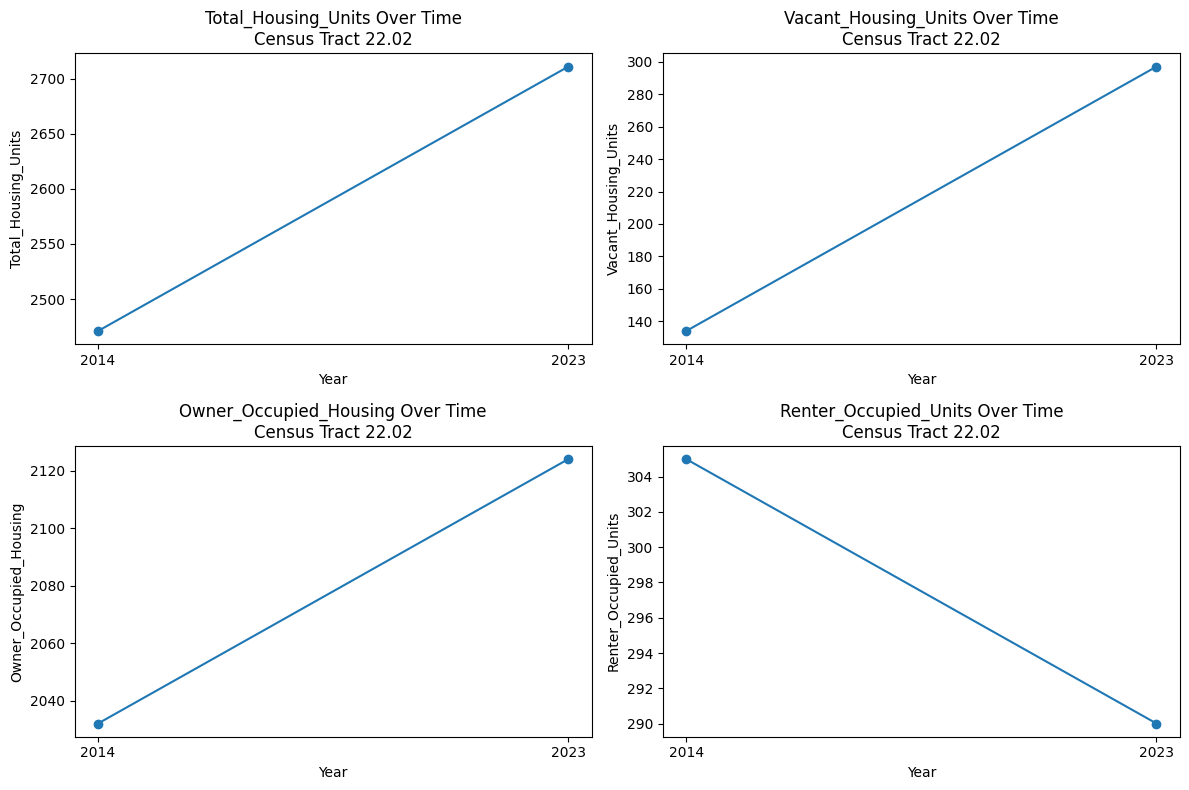

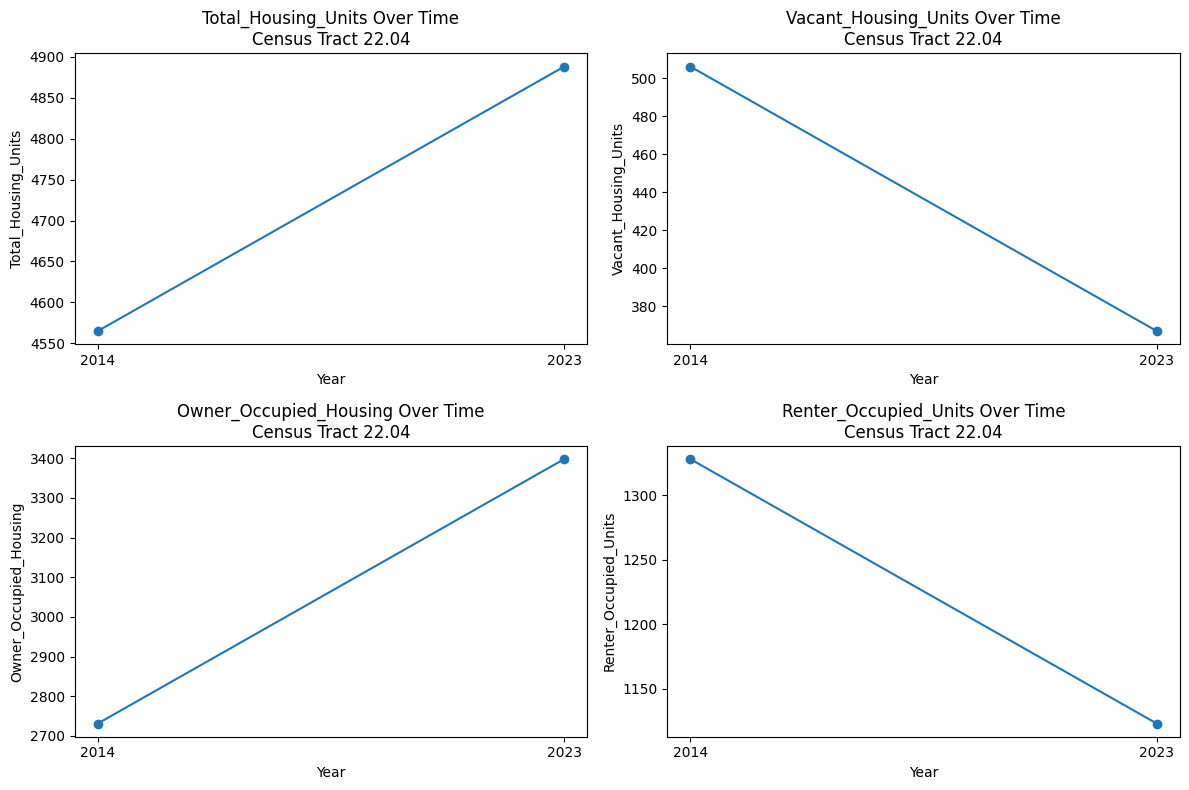

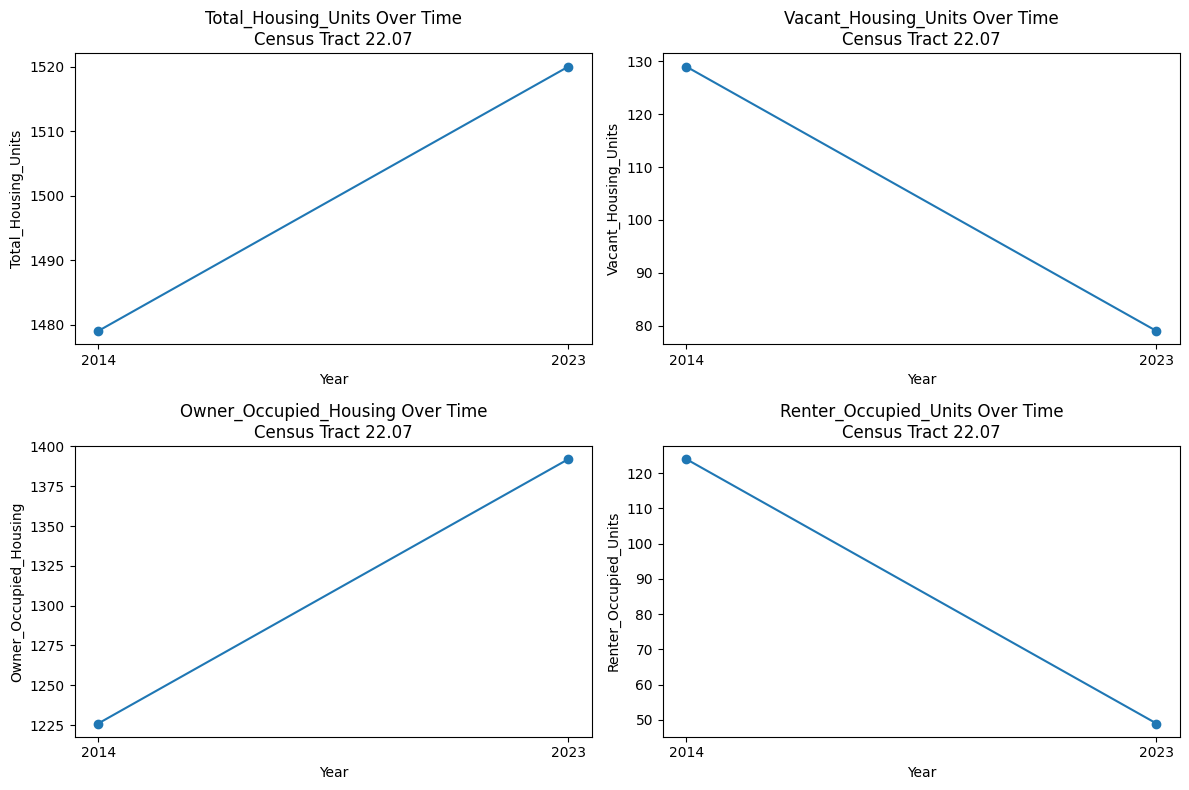

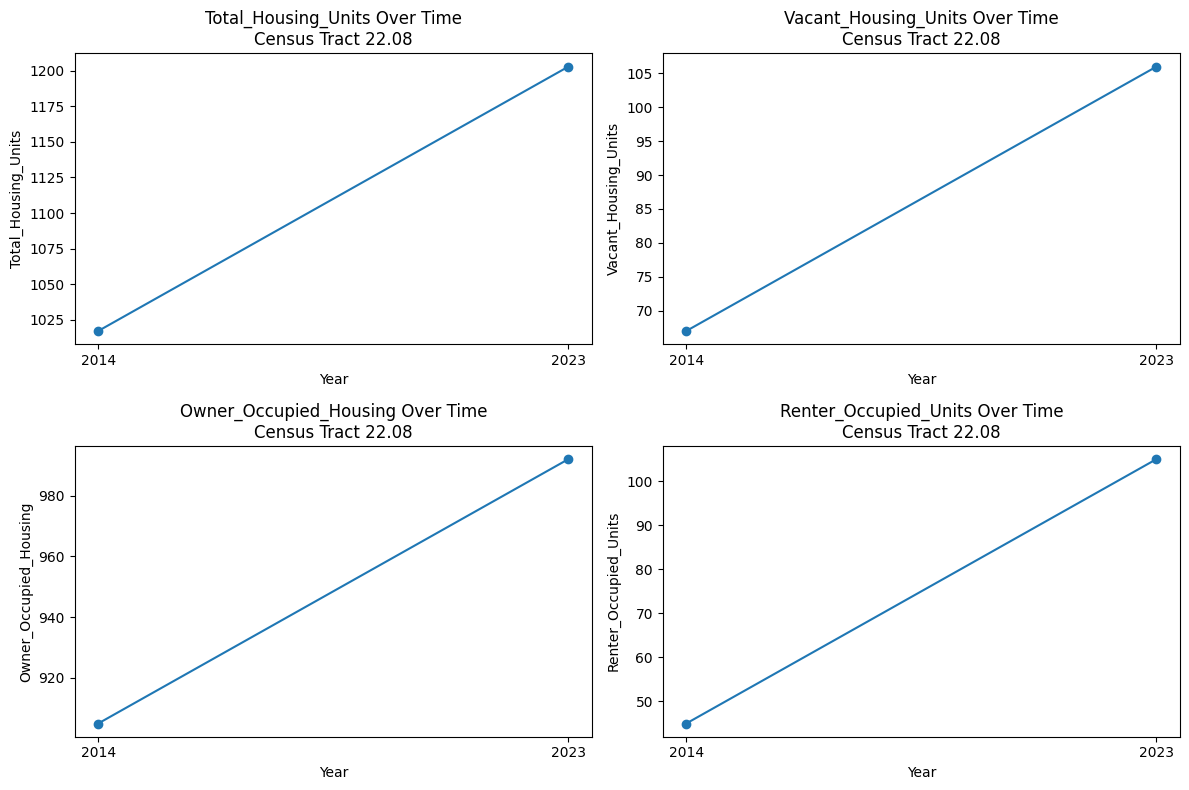

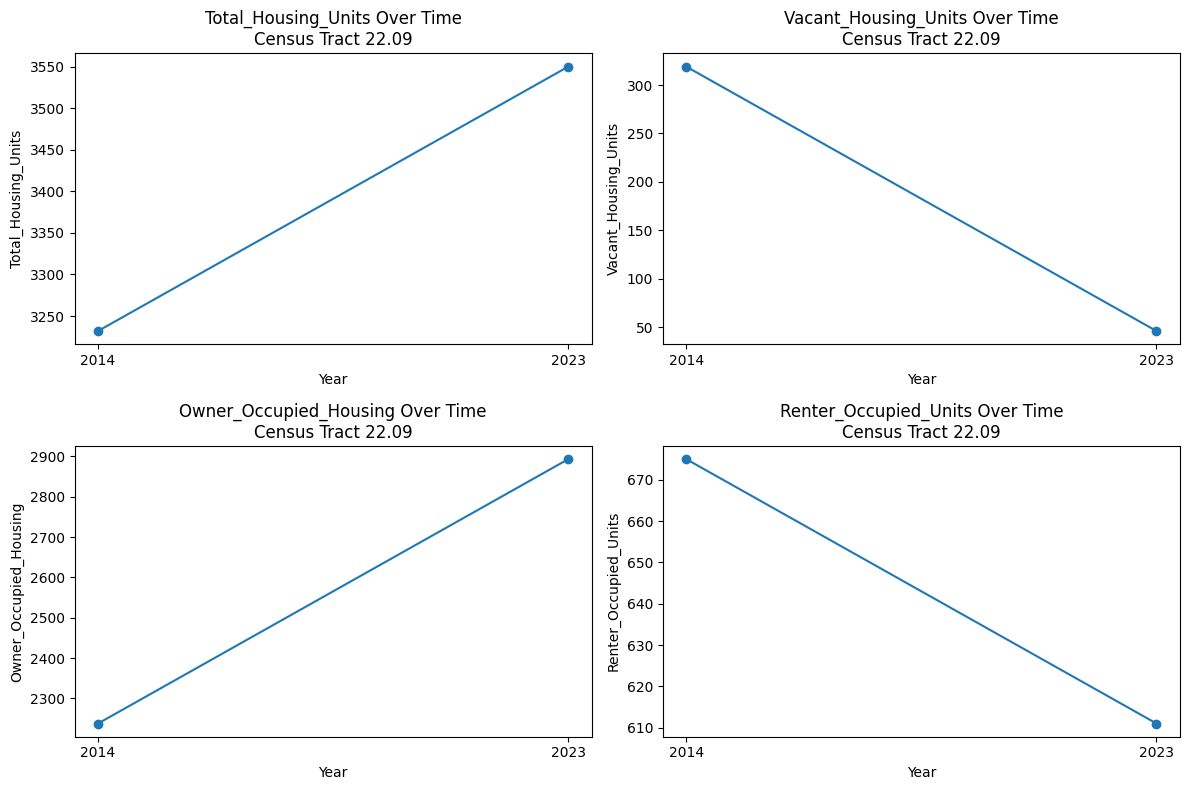

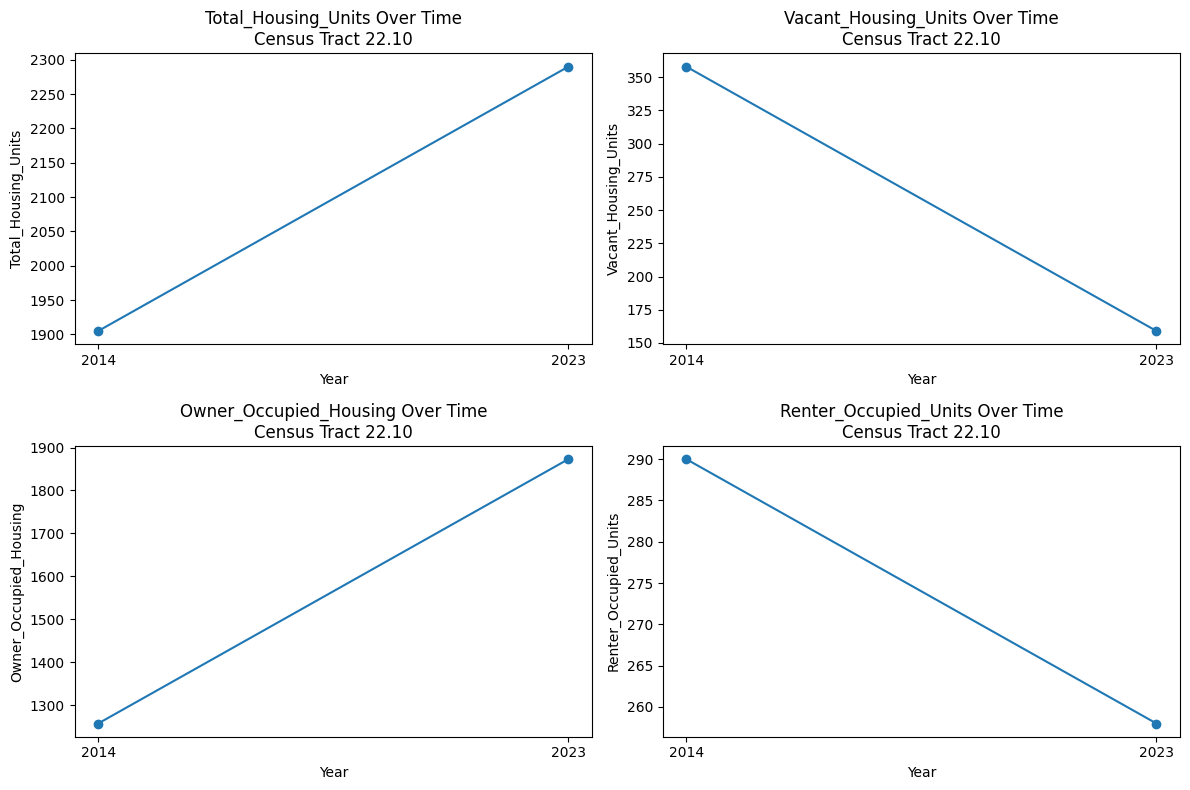

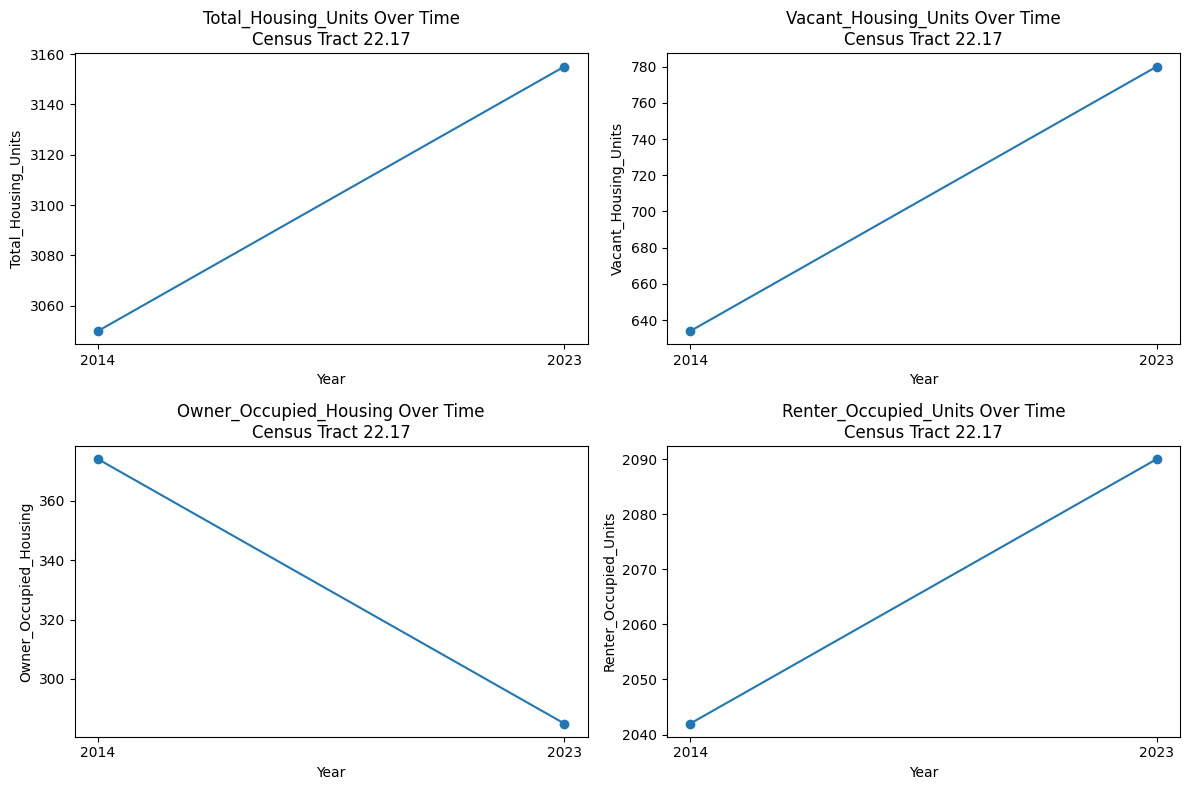

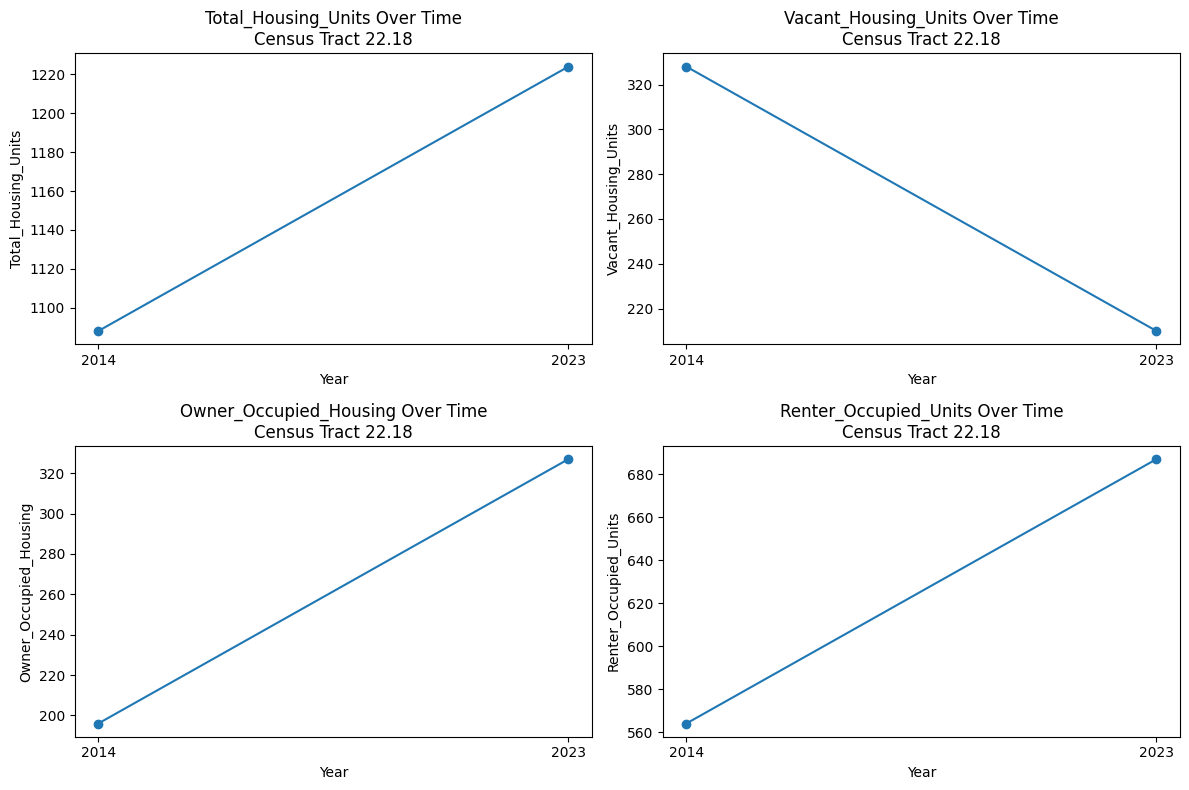

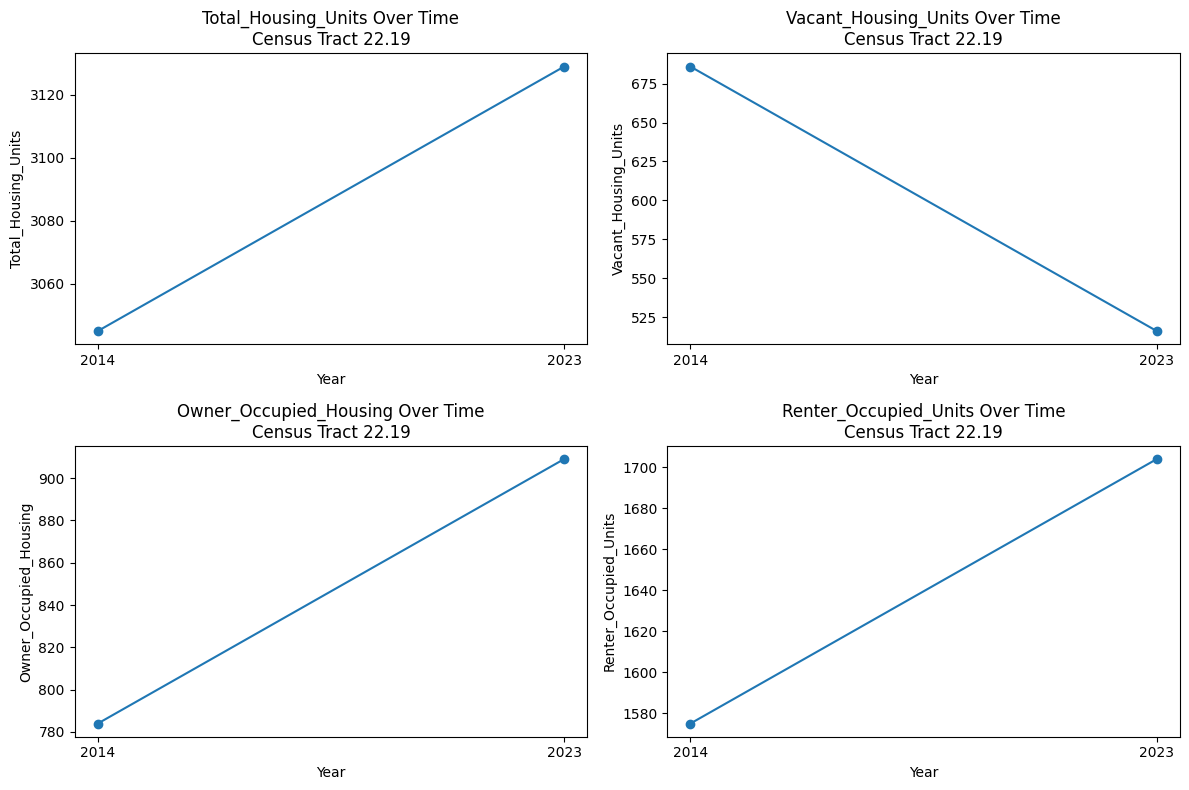

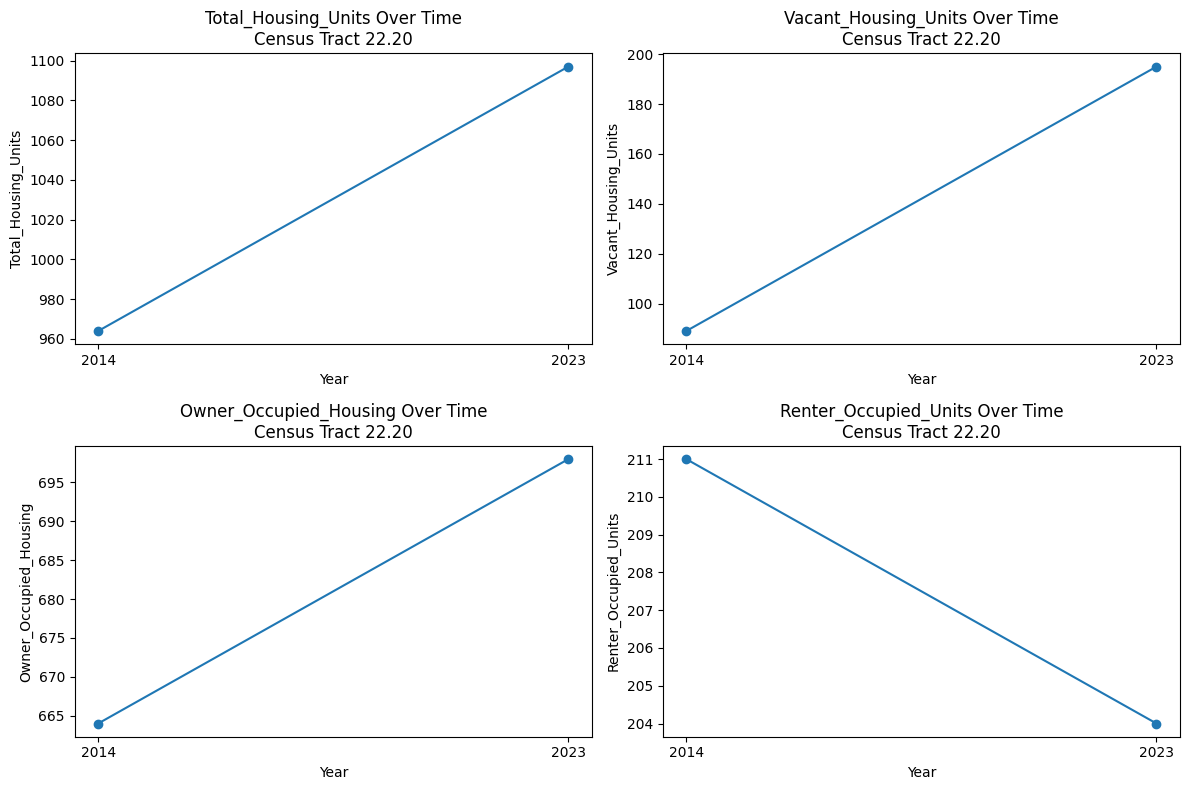

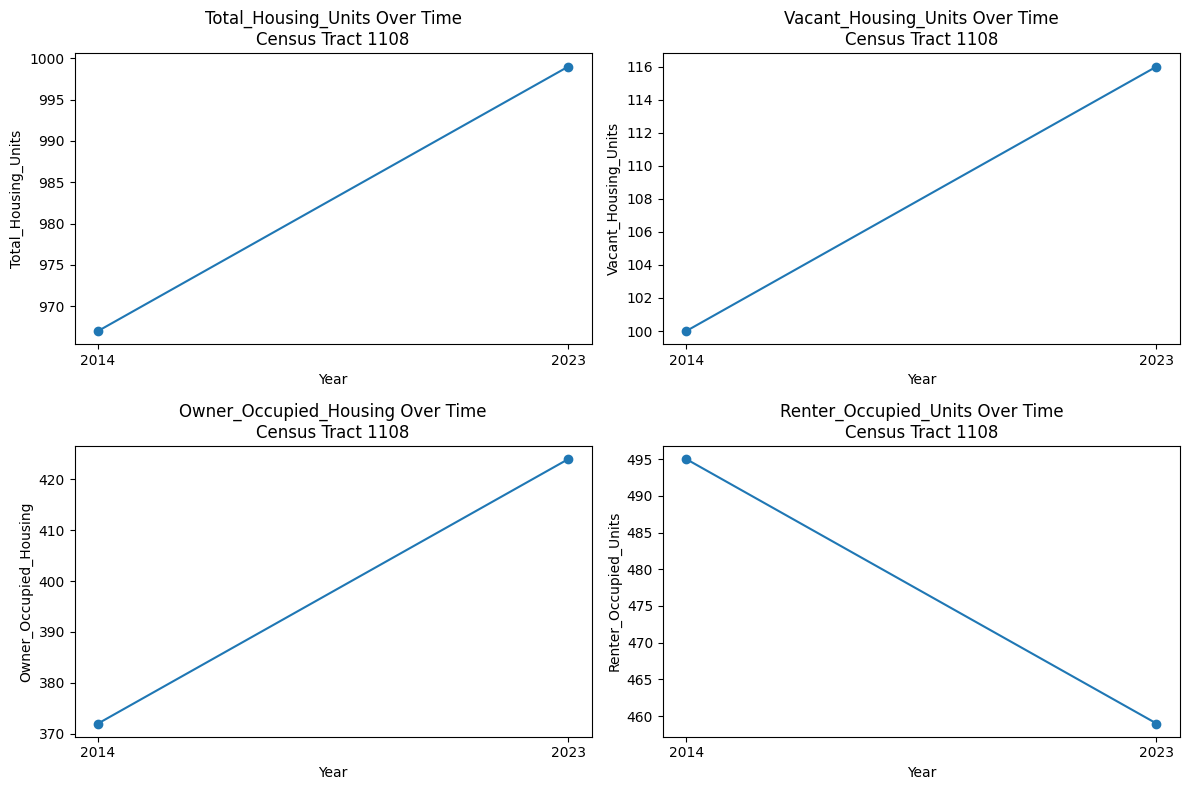

In [20]:
for tract in total_vac['Name'].unique():
    tract_data = total_vac[total_vac['Name'] == tract]
    
    plt.figure(figsize=(12, 8))
    
    for i, variable in enumerate(variables):
        plt.subplot(2, 2, i + 1)
        plt.plot(['2014', '2023'], [tract_data[f'{variable}_2014'].values[0], tract_data[f'{variable}_2023'].values[0]], marker='o')
        plt.title(f'{variable} Over Time\n{tract}')
        plt.xlabel('Year')
        plt.ylabel(variable)
    
    plt.tight_layout()
    plt.show()